## Business Objective

### An aviation company that provides domestic as well as international trips to the customers now wants to apply a targeted approach instead of reaching out to each of the customers. This time they want to do it digitally instead of tele calling. Hence they have collaborated with a social networking platform, so they can learn the digital and social behaviour of the customers and provide the digital advertisement on the user page of the targeted customers who have a high propensity to take up the product.
### Propensity of buying tickets is different for different login devices. Hence, you have to create 2 models separately for Laptop and Mobile. [Anything which is not a laptop can be considered as mobile phone usage.]
### The advertisements on the digital platform are a bit expensive; hence, you need to be very accurate while creating the models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Social Media Data for DSBA.csv") 

In [3]:
df

UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0      1000001           Yes                           307.0  iOS and Android   
1      1000002            No                           367.0              iOS   
2      1000003           Yes                           277.0  iOS and Android   
3      1000004            No                           247.0              iOS   
4      1000005            No                           202.0  iOS and Android   
...        ...           ...                             ...              ...   
11755  1011756            No                           279.0           Laptop   
11756  1011757            No                           305.0              Tab   
11757  1011758            No                           214.0              Tab   
11758  1011759            No                           382.0           Laptop   
11759  1011760            No                           270.0              Tab   

       total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
0                                      38570.0                              1   
1                                       9765.0                              1   
2                                      48055.0                              1   
3                                      48720.0                              1   
4                                      20685.0                              1   
...                                        ...                            ...   
11755                                  30987.0                             23   
11756                                  21510.0                              6   
11757                                   5478.0                              4   
11758                                  35851.0                              2   
11759                                  22025.0                              8   

      member_in_family preferred_location_type  \
0                    2               Financial   
1                    1               Financial   
2                    2                   Other   
3                    4               Financial   
4                    1                 Medical   
...                ...                     ...   
11755                2         Historical site   
11756                1         Historical site   
11757                3                   Beach   
11758                3         Historical site   
11759                3         Historical site   

       Yearly_avg_comment_on_travel_page  \
0                                   94.0   
1                                   61.0   
2                                   92.0   
3                                   56.0   
4                                   40.0   
...                                  ...   
11755                               58.0   
11756                               55.0   
11757                              103.0   
11758                               83.0   
11759                              104.0   

       total_likes_on_outofstation_checkin_received  \
0                                              5993   
1                                              5130   
2                                              2090   
3                                              2909   
4                                              3468   
...                                             ...   
11755                                          2616   
11756                                         10041   
11757                                          6203   
11758                                          5444   
11759                                          4470   

       week_since_last_outstation_checkin following_company_page  \
0                                       8                    Yes   
1                                       1                     No   
2                                       6                    Yes   

In [4]:
df.shape

(11760, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [6]:
df.describe().T

count          mean  \
UserID                                        11760.0  1.005880e+06   
Yearly_avg_view_on_travel_page                11179.0  2.808308e+02   
total_likes_on_outstation_checkin_given       11379.0  2.817048e+04   
Yearly_avg_comment_on_travel_page             11554.0  7.479003e+01   
total_likes_on_outofstation_checkin_received  11760.0  6.531699e+03   
week_since_last_outstation_checkin            11760.0  3.203571e+00   
montly_avg_comment_on_company_page            11760.0  2.866156e+01   
travelling_network_rating                     11760.0  2.712245e+00   
Adult_flag                                    11760.0  7.938776e-01   
Daily_Avg_mins_spend_on_traveling_page        11760.0  1.381743e+01   

                                                       std        min  \
UserID                                         3394.963917  1000001.0   
Yearly_avg_view_on_travel_page                   68.182958       35.0   
total_likes_on_outstation_checkin_given       14385.032134     3570.0   
Yearly_avg_comment_on_travel_page                24.026650        3.0   
total_likes_on_outofstation_checkin_received   4706.613785     1009.0   
week_since_last_outstation_checkin                2.616365        0.0   
montly_avg_comment_on_company_page               48.660504       11.0   
travelling_network_rating                         1.080887        1.0   
Adult_flag                                        0.851823        0.0   
Daily_Avg_mins_spend_on_traveling_page            9.070657        0.0   

                                                     25%        50%  \
UserID                                        1002940.75  1005880.5   
Yearly_avg_view_on_travel_page                    232.00      271.0   
total_likes_on_outstation_checkin_given         16380.00    28076.0   
Yearly_avg_comment_on_travel_page                  57.00       75.0   
total_likes_on_outofstation_checkin_received     2940.75     4948.0   
week_since_last_outstation_checkin                  1.00        3.0   
montly_avg_comment_on_company_page                 17.00       22.0   
travelling_network_rating                           2.00        3.0   
Adult_flag                                          0.00        1.0   
Daily_Avg_mins_spend_on_traveling_page              8.00       12.0   

                                                     75%        max  
UserID                                        1008820.25  1011760.0  
Yearly_avg_view_on_travel_page                    324.00      464.0  
total_likes_on_outstation_checkin_given         40525.00   252430.0  
Yearly_avg_comment_on_travel_page                  92.00      815.0  
total_likes_on_outofstation_checkin_received     8393.25    20065.0  
week_since_last_outstation_checkin                  5.00       11.0  
montly_avg_comment_on_company_page                 27.00      500.0  
travelling_network_rating                           4.00        4.0  
Adult_flag                                          1.00        3.0  
Daily_Avg_mins_spend_on_traveling_page             18.00      270.0

In [7]:
pd.options.display.float_format = '{:.2f}'.format   
df.describe().T

count       mean      std  \
UserID                                       11760.00 1005880.50  3394.96   
Yearly_avg_view_on_travel_page               11179.00     280.83    68.18   
total_likes_on_outstation_checkin_given      11379.00   28170.48 14385.03   
Yearly_avg_comment_on_travel_page            11554.00      74.79    24.03   
total_likes_on_outofstation_checkin_received 11760.00    6531.70  4706.61   
week_since_last_outstation_checkin           11760.00       3.20     2.62   
montly_avg_comment_on_company_page           11760.00      28.66    48.66   
travelling_network_rating                    11760.00       2.71     1.08   
Adult_flag                                   11760.00       0.79     0.85   
Daily_Avg_mins_spend_on_traveling_page       11760.00      13.82     9.07   

                                                    min        25%        50%  \
UserID                                       1000001.00 1002940.75 1005880.50   
Yearly_avg_view_on_travel_page                    35.00     232.00     271.00   
total_likes_on_outstation_checkin_given         3570.00   16380.00   28076.00   
Yearly_avg_comment_on_travel_page                  3.00      57.00      75.00   
total_likes_on_outofstation_checkin_received    1009.00    2940.75    4948.00   
week_since_last_outstation_checkin                 0.00       1.00       3.00   
montly_avg_comment_on_company_page                11.00      17.00      22.00   
travelling_network_rating                          1.00       2.00       3.00   
Adult_flag                                         0.00       0.00       1.00   
Daily_Avg_mins_spend_on_traveling_page             0.00       8.00      12.00   

                                                    75%        max  
UserID                                       1008820.25 1011760.00  
Yearly_avg_view_on_travel_page                   324.00     464.00  
total_likes_on_outstation_checkin_given        40525.00  252430.00  
Yearly_avg_comment_on_travel_page                 92.00     815.00  
total_likes_on_outofstation_checkin_received    8393.25   20065.00  
week_since_last_outstation_checkin                 5.00      11.00  
montly_avg_comment_on_company_page                27.00     500.00  
travelling_network_rating                          4.00       4.00  
Adult_flag                                         1.00       3.00  
Daily_Avg_mins_spend_on_traveling_page            18.00     270.00

In [8]:
df.head()

UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0  1000001           Yes                          307.00  iOS and Android   
1  1000002            No                          367.00              iOS   
2  1000003           Yes                          277.00  iOS and Android   
3  1000004            No                          247.00              iOS   
4  1000005            No                          202.00  iOS and Android   

   total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
0                                 38570.00                              1   
1                                  9765.00                              1   
2                                 48055.00                              1   
3                                 48720.00                              1   
4                                 20685.00                              1   

  member_in_family preferred_location_type  Yearly_avg_comment_on_travel_page  \
0                2               Financial                              94.00   
1                1               Financial                              61.00   
2                2                   Other                              92.00   
3                4               Financial                              56.00   
4                1                 Medical                              40.00   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin following_company_page  \
0                                   8                    Yes   
1                                   1                     No   
2                                   6                    Yes   
3                                   1                    Yes   
4                                   9                     No   

   montly_avg_comment_on_company_page working_flag  travelling_network_rating  \
0                                  11           No                          1   
1                                  23          Yes                          4   
2                                  15           No                          2   
3                                  11           No                          3   
4                                  12           No                          4   

   Adult_flag  Daily_Avg_mins_spend_on_traveling_page  
0           0                                       8  
1           1                                      10  
2           0                                       7  
3           0                                       8  
4           1                                       6

In [9]:
df.tail()

UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
11755  1011756            No                          279.00           Laptop   
11756  1011757            No                          305.00              Tab   
11757  1011758            No                          214.00              Tab   
11758  1011759            No                          382.00           Laptop   
11759  1011760            No                          270.00              Tab   

       total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
11755                                 30987.00                             23   
11756                                 21510.00                              6   
11757                                  5478.00                              4   
11758                                 35851.00                              2   
11759                                 22025.00                              8   

      member_in_family preferred_location_type  \
11755                2         Historical site   
11756                1         Historical site   
11757                3                   Beach   
11758                3         Historical site   
11759                3         Historical site   

       Yearly_avg_comment_on_travel_page  \
11755                              58.00   
11756                              55.00   
11757                             103.00   
11758                              83.00   
11759                             104.00   

       total_likes_on_outofstation_checkin_received  \
11755                                          2616   
11756                                         10041   
11757                                          6203   
11758                                          5444   
11759                                          4470   

       week_since_last_outstation_checkin following_company_page  \
11755                                   4                     No   
11756                                   4                     No   
11757                                   3                    Yes   
11758                                   3                     No   
11759                                   2                     No   

       montly_avg_comment_on_company_page working_flag  \
11755                                  36           No   
11756                                  30           No   
11757                                  40          Yes   
11758                                  32           No   
11759                                  29           No   

       travelling_network_rating  Adult_flag  \
11755                          3           1   
11756                          1           1   
11757                          2           1   
11758                          4           0   
11759                          1           0   

       Daily_Avg_mins_spend_on_traveling_page  
11755                                      23  
11756                                      11  
11757                                      12  
11758                                      20  
11759                                      14

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [12]:
df.preferred_device.unique()

array(['iOS and Android', 'iOS', 'ANDROID', nan, 'Android', 'Android OS',
       'Other', 'Others', 'Tab', 'Laptop', 'Mobile'], dtype=object)

In [13]:
df["preferred_device"].value_counts().sort_index()

ANDROID             134
Android             315
Android OS          145
Laptop             1108
Mobile              600
Other                 2
Others                2
Tab                4172
iOS                1095
iOS and Android    4134
Name: preferred_device, dtype: int64

In [14]:
df.preferred_location_type.unique()

array(['Financial', 'Other', 'Medical', nan, 'Game', 'Social media',
       'Entertainment', 'Tour and Travel', 'Movie', 'OTT', 'Tour  Travel',
       'Beach', 'Historical site', 'Big Cities', 'Trekking',
       'Hill Stations'], dtype=object)

In [15]:
df["preferred_location_type"].value_counts().sort_index()

Beach              2424
Big Cities          636
Entertainment       516
Financial          2409
Game                 12
Hill Stations       108
Historical site    1856
Medical            1845
Movie                 5
OTT                   7
Other               643
Social media        633
Tour  Travel         60
Tour and Travel      47
Trekking            528
Name: preferred_location_type, dtype: int64

In [16]:
df["Taken_product"].value_counts().sort_index()

No     9864
Yes    1896
Name: Taken_product, dtype: int64

In [17]:
df["Adult_flag"].value_counts().sort_index()

0    5048
1    4768
2    1264
3     680
Name: Adult_flag, dtype: int64

In [18]:
df["working_flag"].value_counts().sort_index()

No     9952
Yes    1808
Name: working_flag, dtype: int64

In [19]:
df["following_company_page"].value_counts().sort_index()

0         5
1        12
No     8355
Yes    3285
Name: following_company_page, dtype: int64

In [20]:
df1 = df.drop(columns=['UserID'])

In [21]:
df1['preferred_location_type'] = df1['preferred_location_type'].replace('Tour  Travel', 'Tour and Travel')

In [22]:
df1["preferred_location_type"].value_counts().sort_index()

Beach              2424
Big Cities          636
Entertainment       516
Financial          2409
Game                 12
Hill Stations       108
Historical site    1856
Medical            1845
Movie                 5
OTT                   7
Other               643
Social media        633
Tour and Travel     107
Trekking            528
Name: preferred_location_type, dtype: int64

In [23]:
df1["Adult_flag"].value_counts().sort_index()

0    5048
1    4768
2    1264
3     680
Name: Adult_flag, dtype: int64

In [24]:
df1['Adult_flag'] = df1['Adult_flag'].astype('object')

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11760 non-null  object 
 1   Yearly_avg_view_on_travel_page                11179 non-null  float64
 2   preferred_device                              11707 non-null  object 
 3   total_likes_on_outstation_checkin_given       11379 non-null  float64
 4   yearly_avg_Outstation_checkins                11685 non-null  object 
 5   member_in_family                              11760 non-null  object 
 6   preferred_location_type                       11729 non-null  object 
 7   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 8   total_likes_on_outofstation_checkin_received  11760 non-null  int64  
 9   week_since_last_outstation_checkin            11760 non-null 

In [26]:
df1['Adult_flag'] = df1['Adult_flag'].replace({0: 'No', 1: 'Yes', 2: 'Yes', 3: 'Yes'})

In [27]:
df1["Adult_flag"].value_counts().sort_index()

No     5048
Yes    6712
Name: Adult_flag, dtype: int64

In [28]:
df1["preferred_location_type"].value_counts().sort_index()

Beach              2424
Big Cities          636
Entertainment       516
Financial          2409
Game                 12
Hill Stations       108
Historical site    1856
Medical            1845
Movie                 5
OTT                   7
Other               643
Social media        633
Tour and Travel     107
Trekking            528
Name: preferred_location_type, dtype: int64

In [29]:
df1

Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0               Yes                          307.00  iOS and Android   
1                No                          367.00              iOS   
2               Yes                          277.00  iOS and Android   
3                No                          247.00              iOS   
4                No                          202.00  iOS and Android   
...             ...                             ...              ...   
11755            No                          279.00           Laptop   
11756            No                          305.00              Tab   
11757            No                          214.00              Tab   
11758            No                          382.00           Laptop   
11759            No                          270.00              Tab   

       total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
0                                     38570.00                              1   
1                                      9765.00                              1   
2                                     48055.00                              1   
3                                     48720.00                              1   
4                                     20685.00                              1   
...                                        ...                            ...   
11755                                 30987.00                             23   
11756                                 21510.00                              6   
11757                                  5478.00                              4   
11758                                 35851.00                              2   
11759                                 22025.00                              8   

      member_in_family preferred_location_type  \
0                    2               Financial   
1                    1               Financial   
2                    2                   Other   
3                    4               Financial   
4                    1                 Medical   
...                ...                     ...   
11755                2         Historical site   
11756                1         Historical site   
11757                3                   Beach   
11758                3         Historical site   
11759                3         Historical site   

       Yearly_avg_comment_on_travel_page  \
0                                  94.00   
1                                  61.00   
2                                  92.00   
3                                  56.00   
4                                  40.00   
...                                  ...   
11755                              58.00   
11756                              55.00   
11757                             103.00   
11758                              83.00   
11759                             104.00   

       total_likes_on_outofstation_checkin_received  \
0                                              5993   
1                                              5130   
2                                              2090   
3                                              2909   
4                                              3468   
...                                             ...   
11755                                          2616   
11756                                         10041   
11757                                          6203   
11758                                          5444   
11759                                          4470   

       week_since_last_outstation_checkin following_company_page  \
0                                       8                    Yes   
1                                       1                     No   
2                                       6                    Yes   
3                                       1                    Yes   
4                                    

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11760 non-null  object 
 1   Yearly_avg_view_on_travel_page                11179 non-null  float64
 2   preferred_device                              11707 non-null  object 
 3   total_likes_on_outstation_checkin_given       11379 non-null  float64
 4   yearly_avg_Outstation_checkins                11685 non-null  object 
 5   member_in_family                              11760 non-null  object 
 6   preferred_location_type                       11729 non-null  object 
 7   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 8   total_likes_on_outofstation_checkin_received  11760 non-null  int64  
 9   week_since_last_outstation_checkin            11760 non-null 

In [31]:
df1['yearly_avg_Outstation_checkins'] = pd.to_numeric(df1['yearly_avg_Outstation_checkins'], errors='coerce')

In [32]:
df1["member_in_family"].value_counts().sort_index()

1        1349
10         11
2        2256
3        4561
4        3184
5         384
Three      15
Name: member_in_family, dtype: int64

In [33]:
df1['member_in_family'] = df1['member_in_family'].replace('Three', '3')

In [34]:
df1["member_in_family"].value_counts().sort_index()

1     1349
10      11
2     2256
3     4576
4     3184
5      384
Name: member_in_family, dtype: int64

In [35]:
df1['member_in_family'] = df1['member_in_family'].astype(int)

In [36]:
df1

Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0               Yes                          307.00  iOS and Android   
1                No                          367.00              iOS   
2               Yes                          277.00  iOS and Android   
3                No                          247.00              iOS   
4                No                          202.00  iOS and Android   
...             ...                             ...              ...   
11755            No                          279.00           Laptop   
11756            No                          305.00              Tab   
11757            No                          214.00              Tab   
11758            No                          382.00           Laptop   
11759            No                          270.00              Tab   

       total_likes_on_outstation_checkin_given  \
0                                     38570.00   
1                                      9765.00   
2                                     48055.00   
3                                     48720.00   
4                                     20685.00   
...                                        ...   
11755                                 30987.00   
11756                                 21510.00   
11757                                  5478.00   
11758                                 35851.00   
11759                                 22025.00   

       yearly_avg_Outstation_checkins  member_in_family  \
0                                1.00                 2   
1                                1.00                 1   
2                                1.00                 2   
3                                1.00                 4   
4                                1.00                 1   
...                               ...               ...   
11755                           23.00                 2   
11756                            6.00                 1   
11757                            4.00                 3   
11758                            2.00                 3   
11759                            8.00                 3   

      preferred_location_type  Yearly_avg_comment_on_travel_page  \
0                   Financial                              94.00   
1                   Financial                              61.00   
2                       Other                              92.00   
3                   Financial                              56.00   
4                     Medical                              40.00   
...                       ...                                ...   
11755         Historical site                              58.00   
11756         Historical site                              55.00   
11757                   Beach                             103.00   
11758         Historical site                              83.00   
11759         Historical site                             104.00   

       total_likes_on_outofstation_checkin_received  \
0                                              5993   
1                                              5130   
2                                              2090   
3                                              2909   
4                                              3468   
...                                             ...   
11755                                          2616   
11756                                         10041   
11757                                          6203   
11758                                          5444   
11759                                          4470   

       week_since_last_outstation_checkin following_company_page  \
0                                       8                    Yes   
1                                       1                     No   
2                                       6                    Yes   
3                                       1                    Yes   
4            

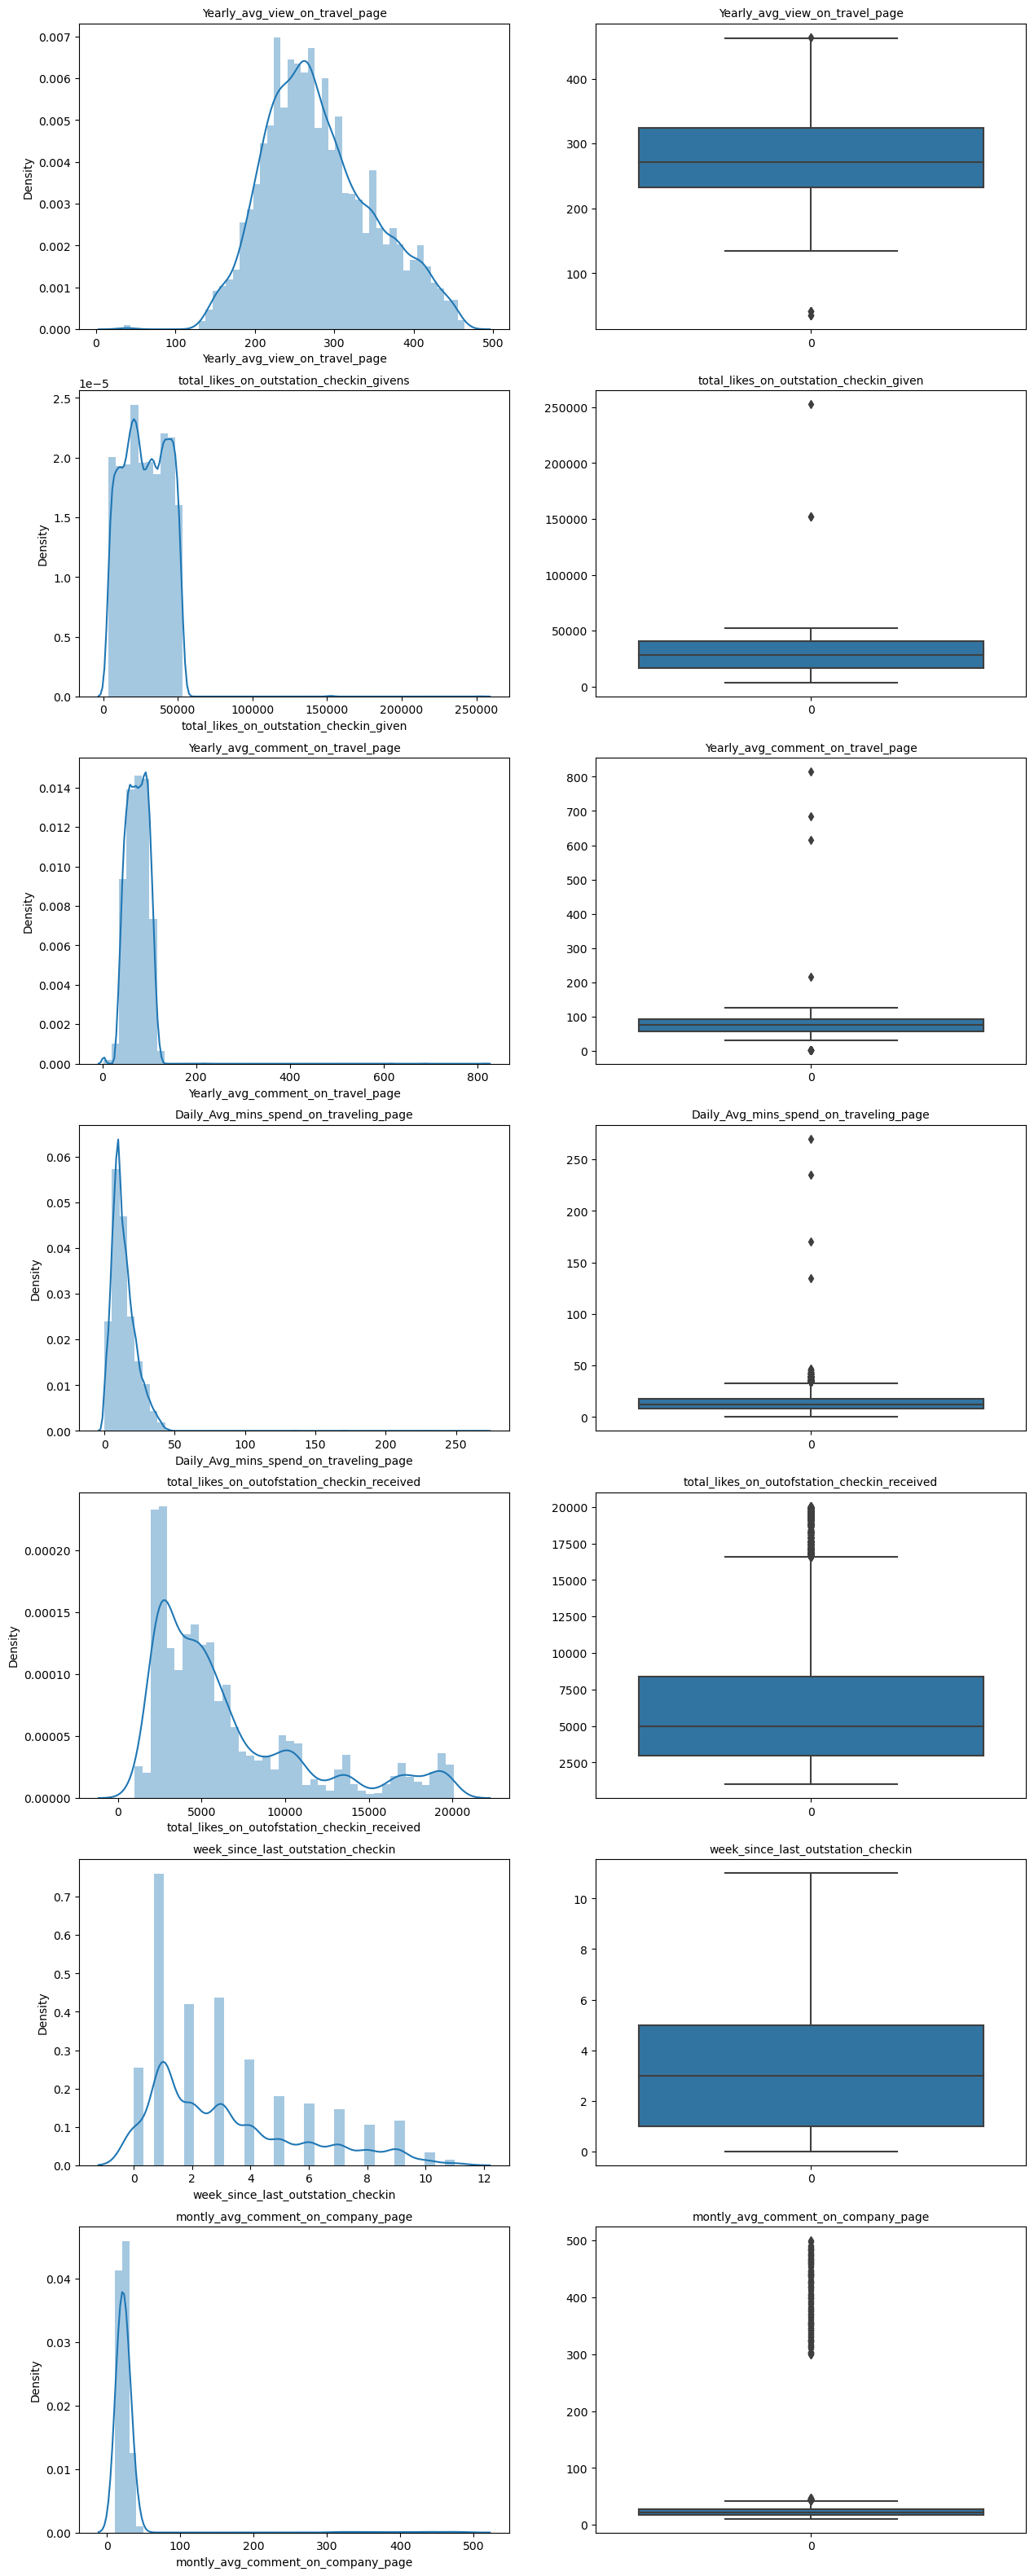

In [37]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(15,40)

a = sns.distplot(df1['Yearly_avg_view_on_travel_page'] , ax=axes[0][0])
a.set_title("Yearly_avg_view_on_travel_page",fontsize=10)

a = sns.boxplot(df1['Yearly_avg_view_on_travel_page'] , orient = "v" , ax=axes[0][1])
a.set_title("Yearly_avg_view_on_travel_page",fontsize=10)


a = sns.distplot(df1['total_likes_on_outstation_checkin_given'] , ax=axes[1][0])
a.set_title("total_likes_on_outstation_checkin_givens",fontsize=10)

a = sns.boxplot(df1['total_likes_on_outstation_checkin_given'] , orient = "v" , ax=axes[1][1])
a.set_title("total_likes_on_outstation_checkin_given",fontsize=10)


a = sns.distplot(df1['Yearly_avg_comment_on_travel_page'] , ax=axes[2][0])
a.set_title("Yearly_avg_comment_on_travel_page",fontsize=10)

a = sns.boxplot(df1['Yearly_avg_comment_on_travel_page'] , orient = "v" , ax=axes[2][1])
a.set_title("Yearly_avg_comment_on_travel_page",fontsize=10)


a = sns.distplot(df1['Daily_Avg_mins_spend_on_traveling_page'] , ax=axes[3][0])
a.set_title("Daily_Avg_mins_spend_on_traveling_page",fontsize=10)

a = sns.boxplot(df1['Daily_Avg_mins_spend_on_traveling_page'] , orient = "v" , ax=axes[3][1])
a.set_title("Daily_Avg_mins_spend_on_traveling_page",fontsize=10)


a = sns.distplot(df1['total_likes_on_outofstation_checkin_received'] , ax=axes[4][0])
a.set_title("total_likes_on_outofstation_checkin_received",fontsize=10)

a = sns.boxplot(df1['total_likes_on_outofstation_checkin_received'] , orient = "v" , ax=axes[4][1])
a.set_title("total_likes_on_outofstation_checkin_received",fontsize=10)


a = sns.distplot(df1['week_since_last_outstation_checkin'] , ax=axes[5][0])
a.set_title("week_since_last_outstation_checkin",fontsize=10)

a = sns.boxplot(df1['week_since_last_outstation_checkin'] , orient = "v" , ax=axes[5][1])
a.set_title("week_since_last_outstation_checkin",fontsize=10)

a = sns.distplot(df1['montly_avg_comment_on_company_page'] , ax=axes[6][0])
a.set_title("montly_avg_comment_on_company_page",fontsize=10)

a = sns.boxplot(df1['montly_avg_comment_on_company_page'] , orient = "v" , ax=axes[6][1])
a.set_title("montly_avg_comment_on_company_page",fontsize=10)

                     

plt.show()

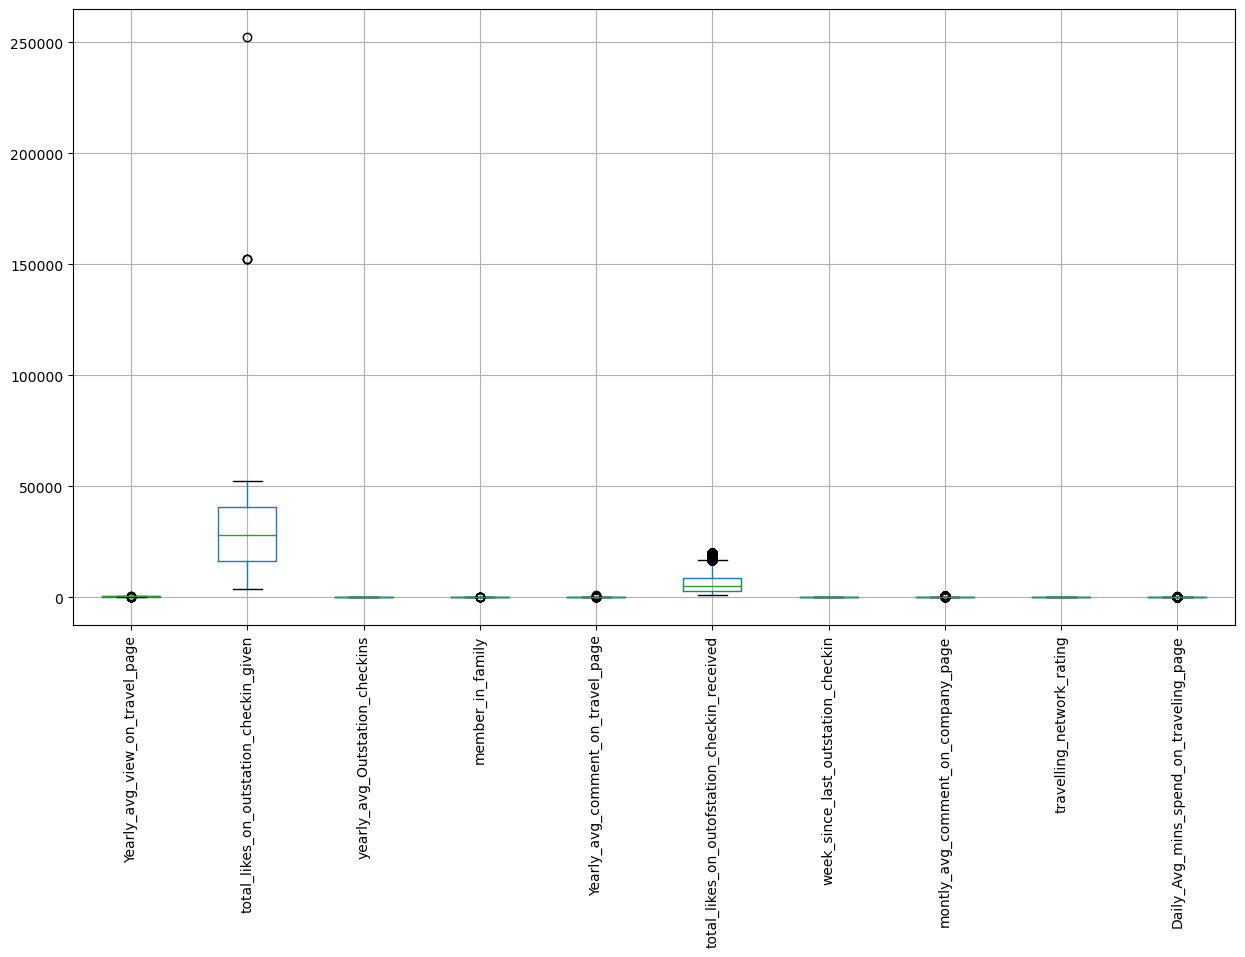

In [38]:
df1.boxplot(figsize=(15,8))
plt.xticks(rotation=90)
plt.show();

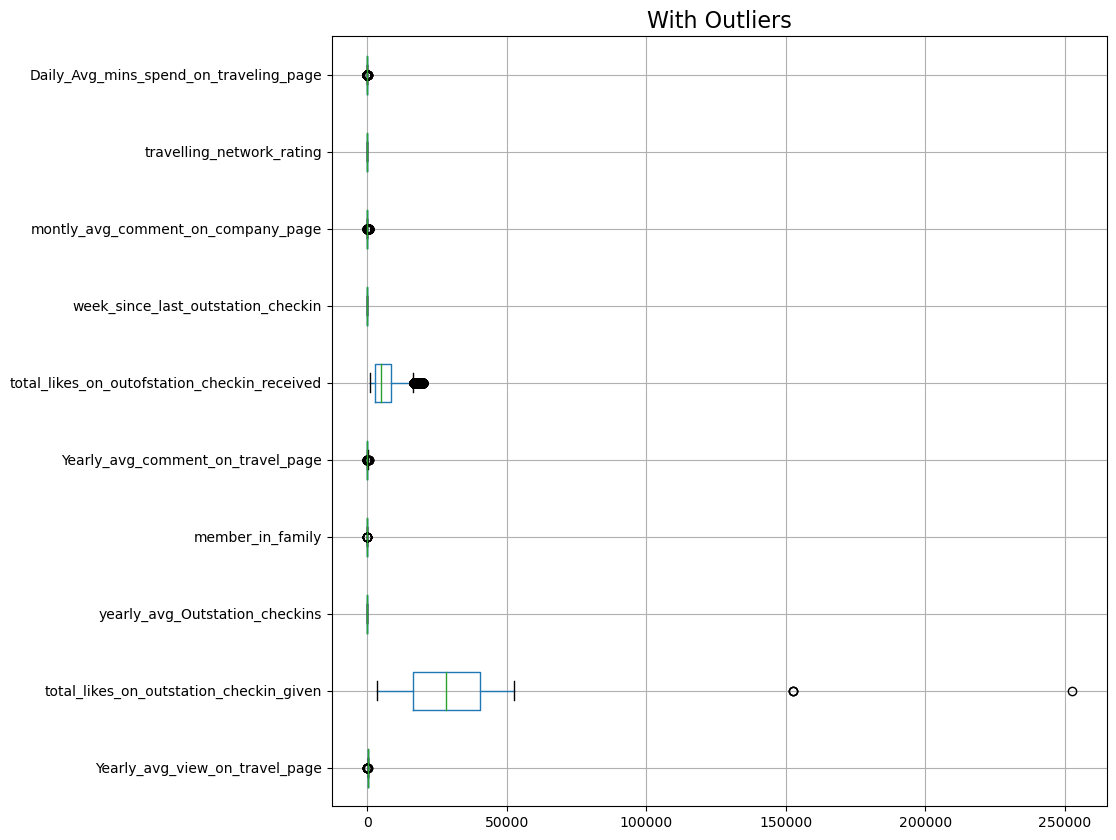

In [39]:
# construct box plot for continuous variables
cont=df1.dtypes[(df1.dtypes!='uint8') & (df1.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df1[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [40]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [41]:
df1

Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0               Yes                          307.00  iOS and Android   
1                No                          367.00              iOS   
2               Yes                          277.00  iOS and Android   
3                No                          247.00              iOS   
4                No                          202.00  iOS and Android   
...             ...                             ...              ...   
11755            No                          279.00           Laptop   
11756            No                          305.00              Tab   
11757            No                          214.00              Tab   
11758            No                          382.00           Laptop   
11759            No                          270.00              Tab   

       total_likes_on_outstation_checkin_given  \
0                                     38570.00   
1                                      9765.00   
2                                     48055.00   
3                                     48720.00   
4                                     20685.00   
...                                        ...   
11755                                 30987.00   
11756                                 21510.00   
11757                                  5478.00   
11758                                 35851.00   
11759                                 22025.00   

       yearly_avg_Outstation_checkins  member_in_family  \
0                                1.00                 2   
1                                1.00                 1   
2                                1.00                 2   
3                                1.00                 4   
4                                1.00                 1   
...                               ...               ...   
11755                           23.00                 2   
11756                            6.00                 1   
11757                            4.00                 3   
11758                            2.00                 3   
11759                            8.00                 3   

      preferred_location_type  Yearly_avg_comment_on_travel_page  \
0                   Financial                              94.00   
1                   Financial                              61.00   
2                       Other                              92.00   
3                   Financial                              56.00   
4                     Medical                              40.00   
...                       ...                                ...   
11755         Historical site                              58.00   
11756         Historical site                              55.00   
11757                   Beach                             103.00   
11758         Historical site                              83.00   
11759         Historical site                             104.00   

       total_likes_on_outofstation_checkin_received  \
0                                              5993   
1                                              5130   
2                                              2090   
3                                              2909   
4                                              3468   
...                                             ...   
11755                                          2616   
11756                                         10041   
11757                                          6203   
11758                                          5444   
11759                                          4470   

       week_since_last_outstation_checkin following_company_page  \
0                                       8                    Yes   
1                                       1                     No   
2                                       6                    Yes   
3                                       1                    Yes   
4            

In [42]:
for column in cont:
    if pd.api.types.is_numeric_dtype(df1[column]):
        lr,ur=remove_outlier(df1[column])
        df1[column]=np.where(df1[column]>ur,ur,df1[column])
        df1[column]=np.where(df1[column]<lr,lr,df1[column])

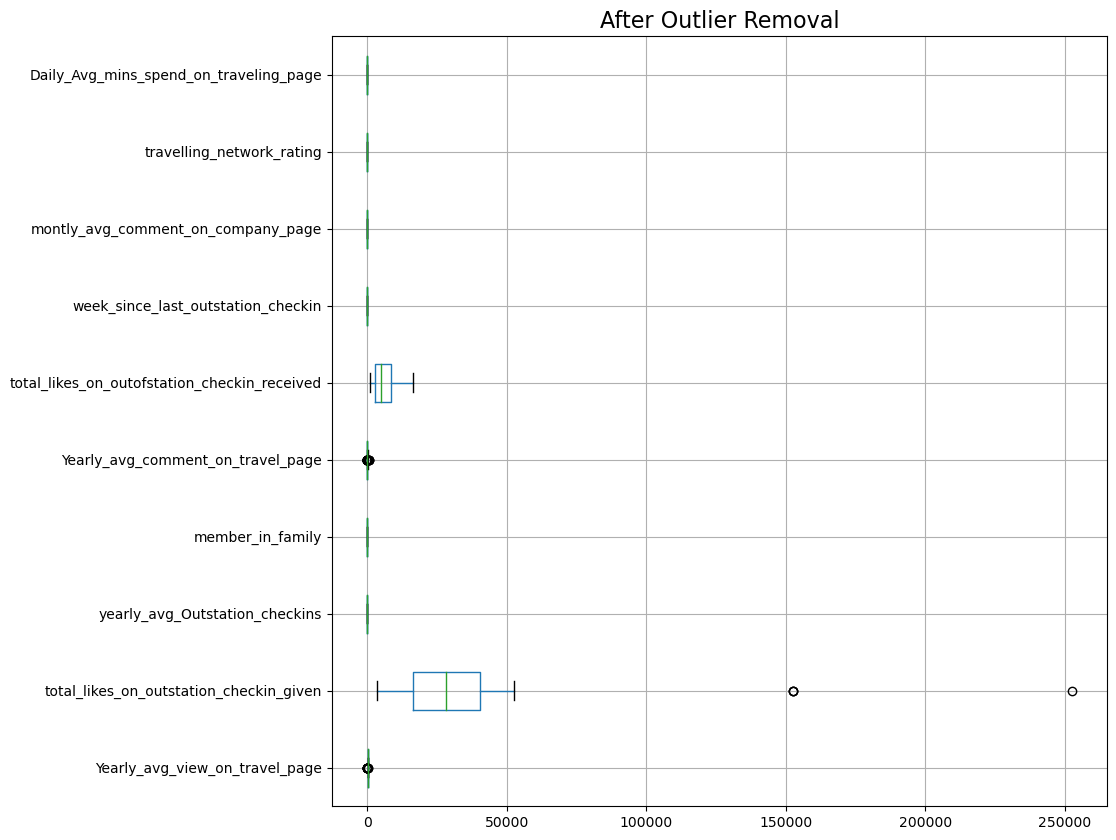

In [43]:
plt.figure(figsize=(10,10))
df1[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [44]:
# Check for missing value in any column
df1.isnull().sum()

Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   76
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [45]:
# checking the data type
df1[df1.isnull().sum()[df1.isnull().sum()>0].index].dtypes

Yearly_avg_view_on_travel_page             float64
preferred_device                            object
total_likes_on_outstation_checkin_given    float64
yearly_avg_Outstation_checkins             float64
preferred_location_type                     object
Yearly_avg_comment_on_travel_page          float64
following_company_page                      object
dtype: object

In [46]:
median1=df1["Yearly_avg_view_on_travel_page"].median()

df1["Yearly_avg_view_on_travel_page"].replace(np.nan,median1,inplace=True)

In [47]:
median1=df1["total_likes_on_outstation_checkin_given"].median()

df1["total_likes_on_outstation_checkin_given"].replace(np.nan,median1,inplace=True)

median2=df1["yearly_avg_Outstation_checkins"].median()

df1["yearly_avg_Outstation_checkins"].replace(np.nan,median2,inplace=True)

median3=df1["Yearly_avg_comment_on_travel_page"].median()

df1["Yearly_avg_comment_on_travel_page"].replace(np.nan,median3,inplace=True)

In [48]:
# Replacing NULL values in Categorical Columns using Mode

mode1=df1["preferred_device"].mode().values[0]

df1["preferred_device"]=df1["preferred_device"].replace(np.nan,mode1)

mode2=df1["preferred_location_type"].mode().values[0]

df1["preferred_location_type"]=df1["preferred_location_type"].replace(np.nan,mode2)

mode3=df1["following_company_page"].mode().values[0]

df1["following_company_page"]=df1["following_company_page"].replace(np.nan,mode3)

In [49]:
# Check for missing value in any column
df1.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

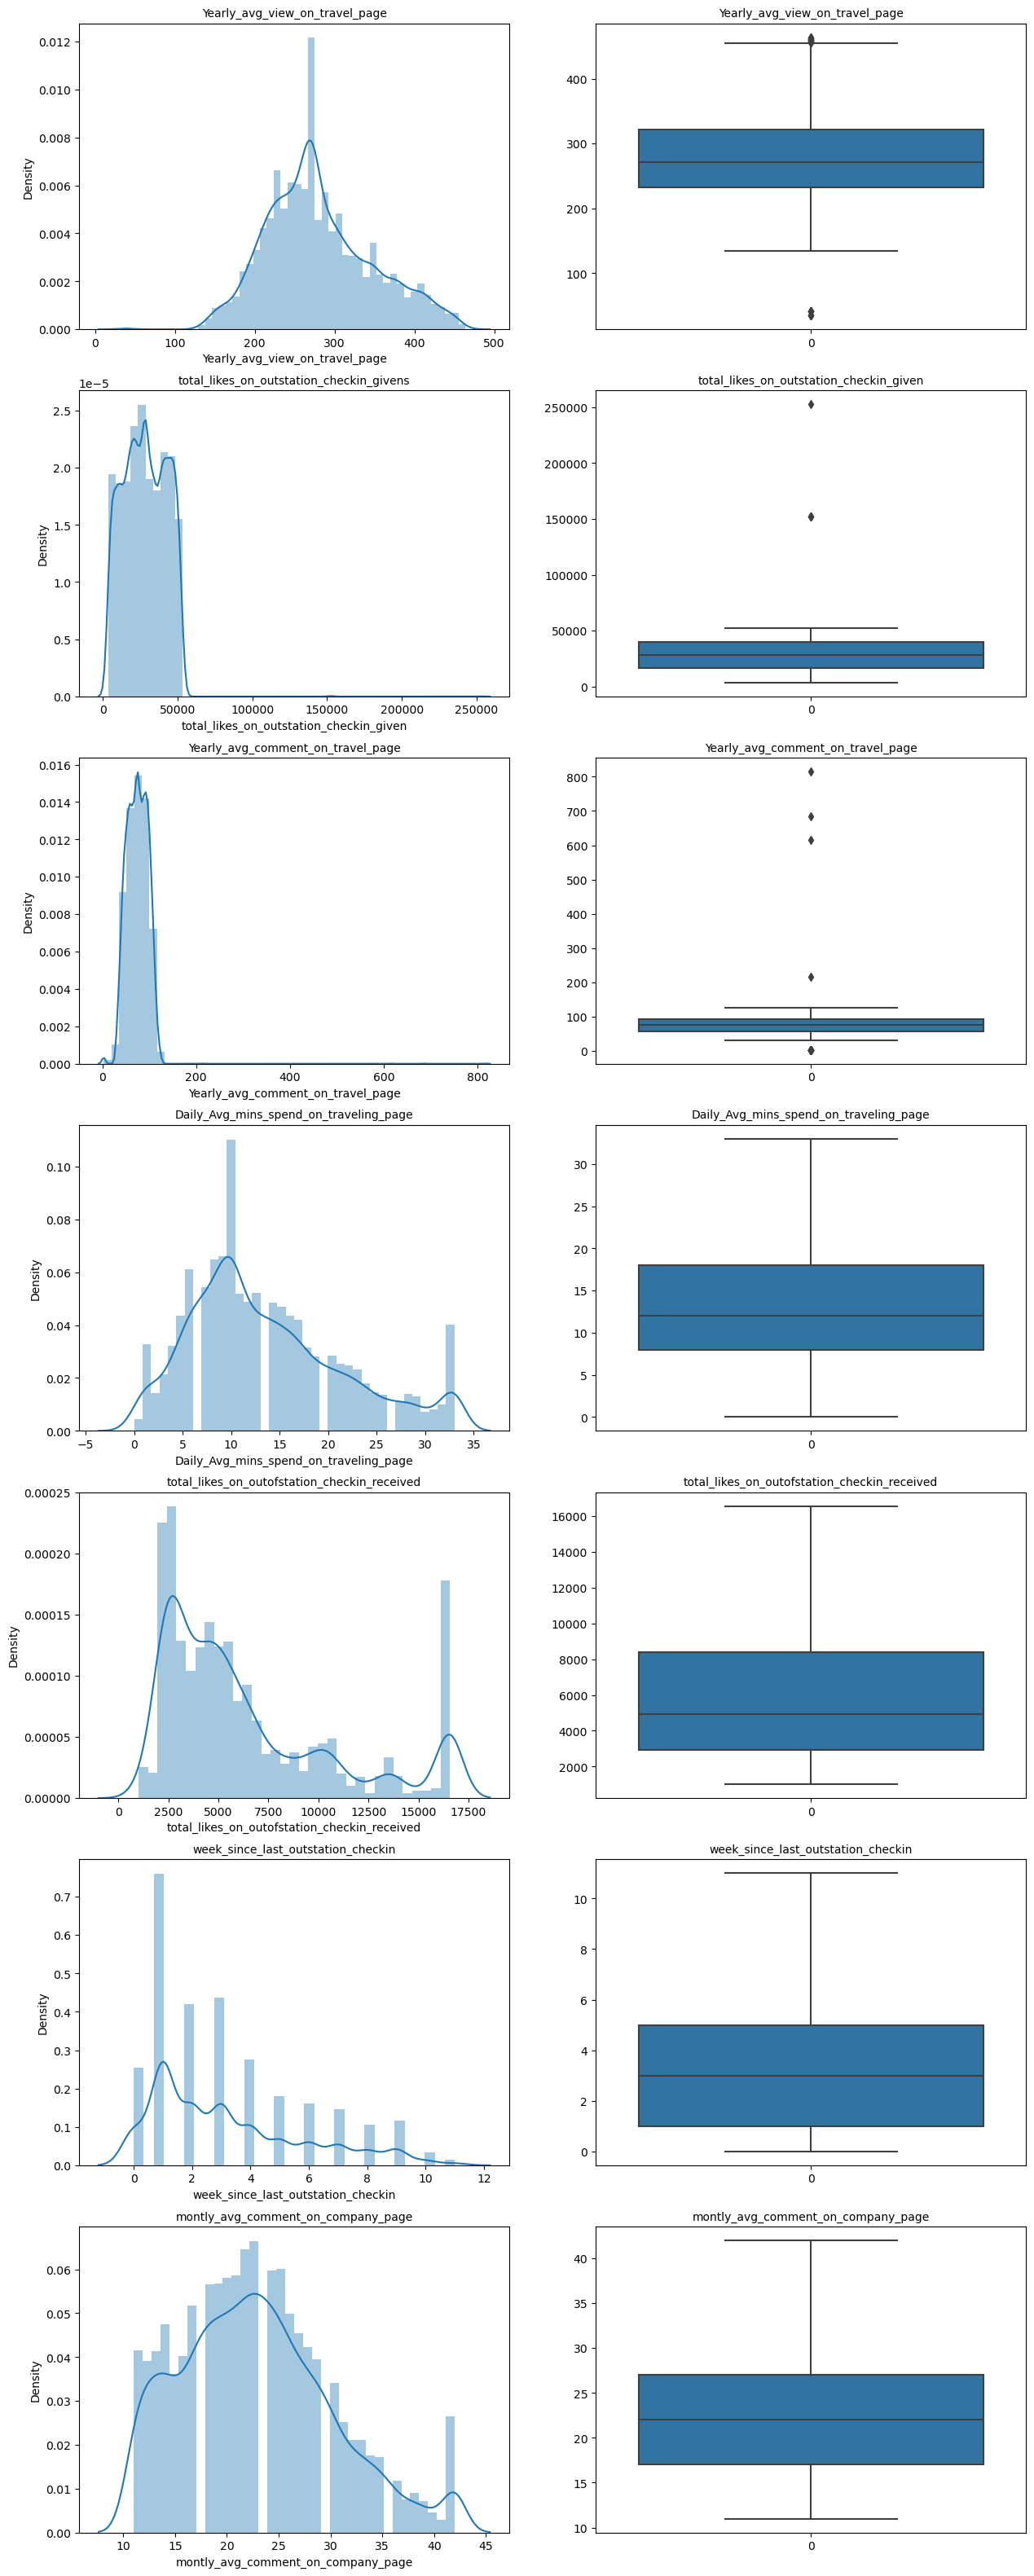

In [50]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(15,40)

a = sns.distplot(df1['Yearly_avg_view_on_travel_page'] , ax=axes[0][0])
a.set_title("Yearly_avg_view_on_travel_page",fontsize=10)

a = sns.boxplot(df1['Yearly_avg_view_on_travel_page'] , orient = "v" , ax=axes[0][1])
a.set_title("Yearly_avg_view_on_travel_page",fontsize=10)


a = sns.distplot(df1['total_likes_on_outstation_checkin_given'] , ax=axes[1][0])
a.set_title("total_likes_on_outstation_checkin_givens",fontsize=10)

a = sns.boxplot(df1['total_likes_on_outstation_checkin_given'] , orient = "v" , ax=axes[1][1])
a.set_title("total_likes_on_outstation_checkin_given",fontsize=10)


a = sns.distplot(df1['Yearly_avg_comment_on_travel_page'] , ax=axes[2][0])
a.set_title("Yearly_avg_comment_on_travel_page",fontsize=10)

a = sns.boxplot(df1['Yearly_avg_comment_on_travel_page'] , orient = "v" , ax=axes[2][1])
a.set_title("Yearly_avg_comment_on_travel_page",fontsize=10)


a = sns.distplot(df1['Daily_Avg_mins_spend_on_traveling_page'] , ax=axes[3][0])
a.set_title("Daily_Avg_mins_spend_on_traveling_page",fontsize=10)

a = sns.boxplot(df1['Daily_Avg_mins_spend_on_traveling_page'] , orient = "v" , ax=axes[3][1])
a.set_title("Daily_Avg_mins_spend_on_traveling_page",fontsize=10)


a = sns.distplot(df1['total_likes_on_outofstation_checkin_received'] , ax=axes[4][0])
a.set_title("total_likes_on_outofstation_checkin_received",fontsize=10)

a = sns.boxplot(df1['total_likes_on_outofstation_checkin_received'] , orient = "v" , ax=axes[4][1])
a.set_title("total_likes_on_outofstation_checkin_received",fontsize=10)


a = sns.distplot(df1['week_since_last_outstation_checkin'] , ax=axes[5][0])
a.set_title("week_since_last_outstation_checkin",fontsize=10)

a = sns.boxplot(df1['week_since_last_outstation_checkin'] , orient = "v" , ax=axes[5][1])
a.set_title("week_since_last_outstation_checkin",fontsize=10)

a = sns.distplot(df1['montly_avg_comment_on_company_page'] , ax=axes[6][0])
a.set_title("montly_avg_comment_on_company_page",fontsize=10)

a = sns.boxplot(df1['montly_avg_comment_on_company_page'] , orient = "v" , ax=axes[6][1])
a.set_title("montly_avg_comment_on_company_page",fontsize=10)

                     

plt.show()

In [51]:
df1

Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0               Yes                          307.00  iOS and Android   
1                No                          367.00              iOS   
2               Yes                          277.00  iOS and Android   
3                No                          247.00              iOS   
4                No                          202.00  iOS and Android   
...             ...                             ...              ...   
11755            No                          279.00           Laptop   
11756            No                          305.00              Tab   
11757            No                          214.00              Tab   
11758            No                          382.00           Laptop   
11759            No                          270.00              Tab   

       total_likes_on_outstation_checkin_given  \
0                                     38570.00   
1                                      9765.00   
2                                     48055.00   
3                                     48720.00   
4                                     20685.00   
...                                        ...   
11755                                 30987.00   
11756                                 21510.00   
11757                                  5478.00   
11758                                 35851.00   
11759                                 22025.00   

       yearly_avg_Outstation_checkins  member_in_family  \
0                                1.00              2.00   
1                                1.00              1.00   
2                                1.00              2.00   
3                                1.00              4.00   
4                                1.00              1.00   
...                               ...               ...   
11755                           23.00              2.00   
11756                            6.00              1.00   
11757                            4.00              3.00   
11758                            2.00              3.00   
11759                            8.00              3.00   

      preferred_location_type  Yearly_avg_comment_on_travel_page  \
0                   Financial                              94.00   
1                   Financial                              61.00   
2                       Other                              92.00   
3                   Financial                              56.00   
4                     Medical                              40.00   
...                       ...                                ...   
11755         Historical site                              58.00   
11756         Historical site                              55.00   
11757                   Beach                             103.00   
11758         Historical site                              83.00   
11759         Historical site                             104.00   

       total_likes_on_outofstation_checkin_received  \
0                                           5993.00   
1                                           5130.00   
2                                           2090.00   
3                                           2909.00   
4                                           3468.00   
...                                             ...   
11755                                       2616.00   
11756                                      10041.00   
11757                                       6203.00   
11758                                       5444.00   
11759                                       4470.00   

       week_since_last_outstation_checkin following_company_page  \
0                                    8.00                    Yes   
1                                    1.00                     No   
2                                    6.00                    Yes   
3                                    1.00                    Yes   
4            

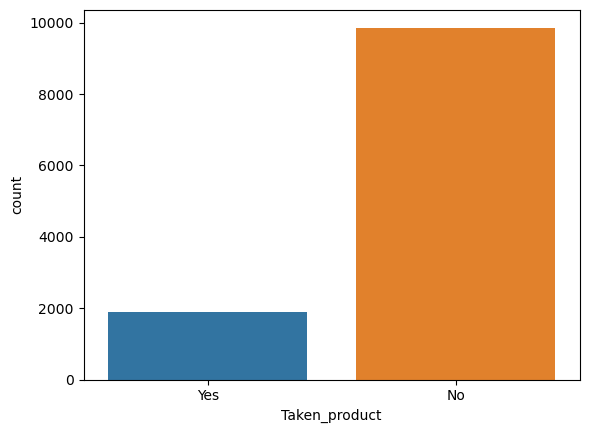

In [52]:
sns.countplot(x='Taken_product', data=df1)

# Show the plot
plt.show()

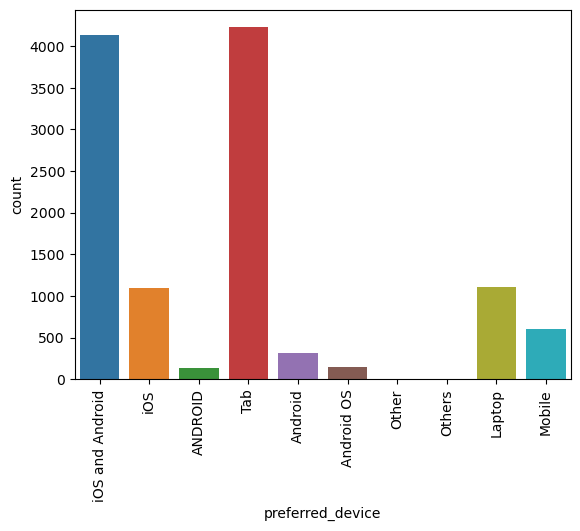

In [53]:
sns.countplot(x='preferred_device', data=df1)
plt.xticks(rotation=90)
# Show the plot
plt.show()

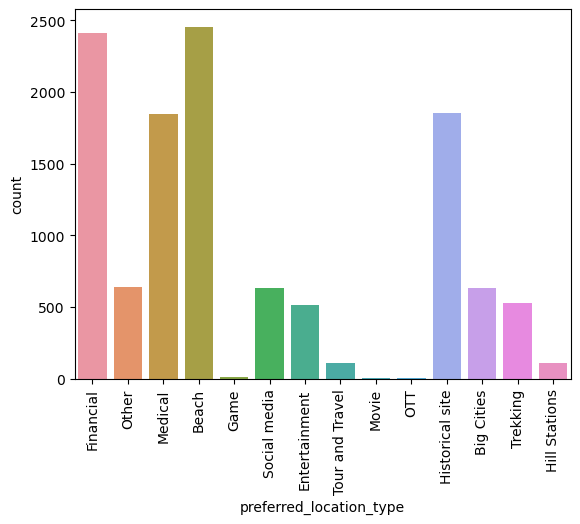

In [54]:
sns.countplot(x='preferred_location_type', data=df1)
plt.xticks(rotation=90)
# Show the plot
plt.show()

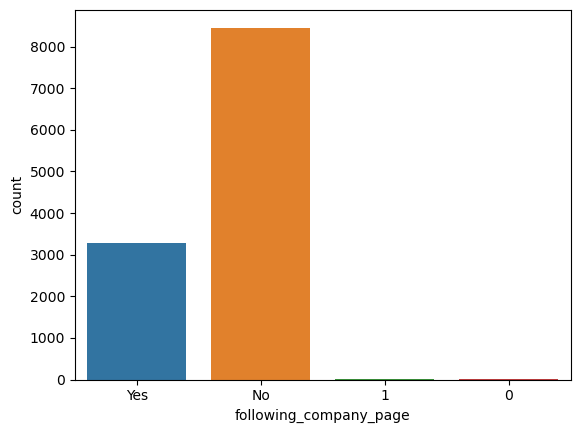

In [55]:
sns.countplot(x='following_company_page', data=df1)

# Show the plot
plt.show()

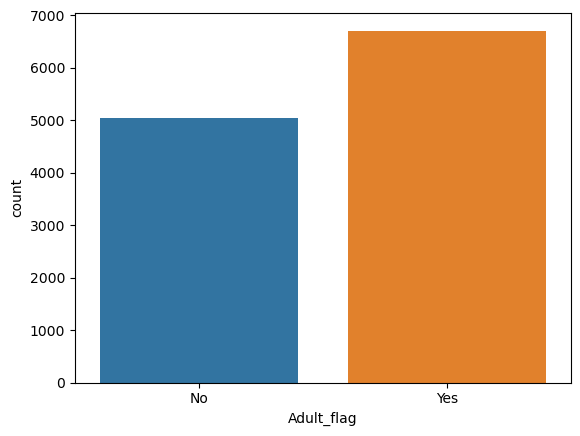

In [56]:
sns.countplot(x='Adult_flag', data=df1)

# Show the plot
plt.show()

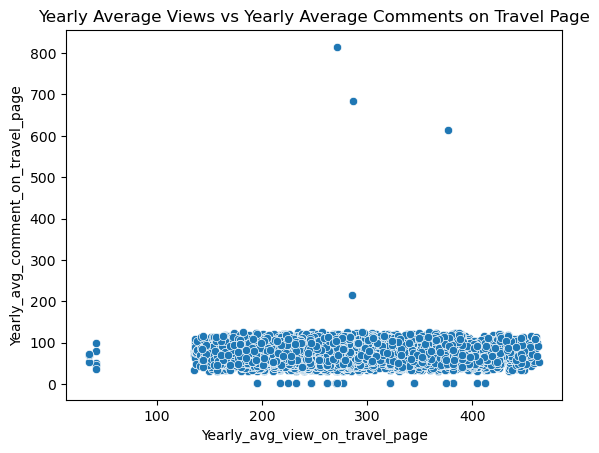

In [57]:
sns.scatterplot(x='Yearly_avg_view_on_travel_page', y='Yearly_avg_comment_on_travel_page', data=df1)
plt.title('Yearly Average Views vs Yearly Average Comments on Travel Page')
plt.show()

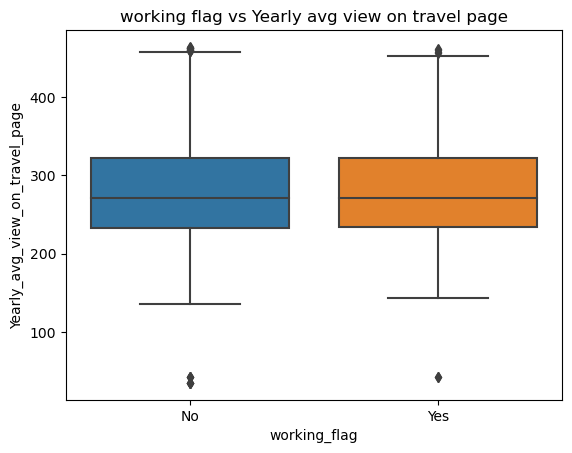

In [58]:
#working_flag vs Yearly_avg_view_on_travel_page

sns.boxplot(x='working_flag', y='Yearly_avg_view_on_travel_page', data=df1)
plt.title('working flag vs Yearly avg view on travel page')
plt.show()

<Axes: >

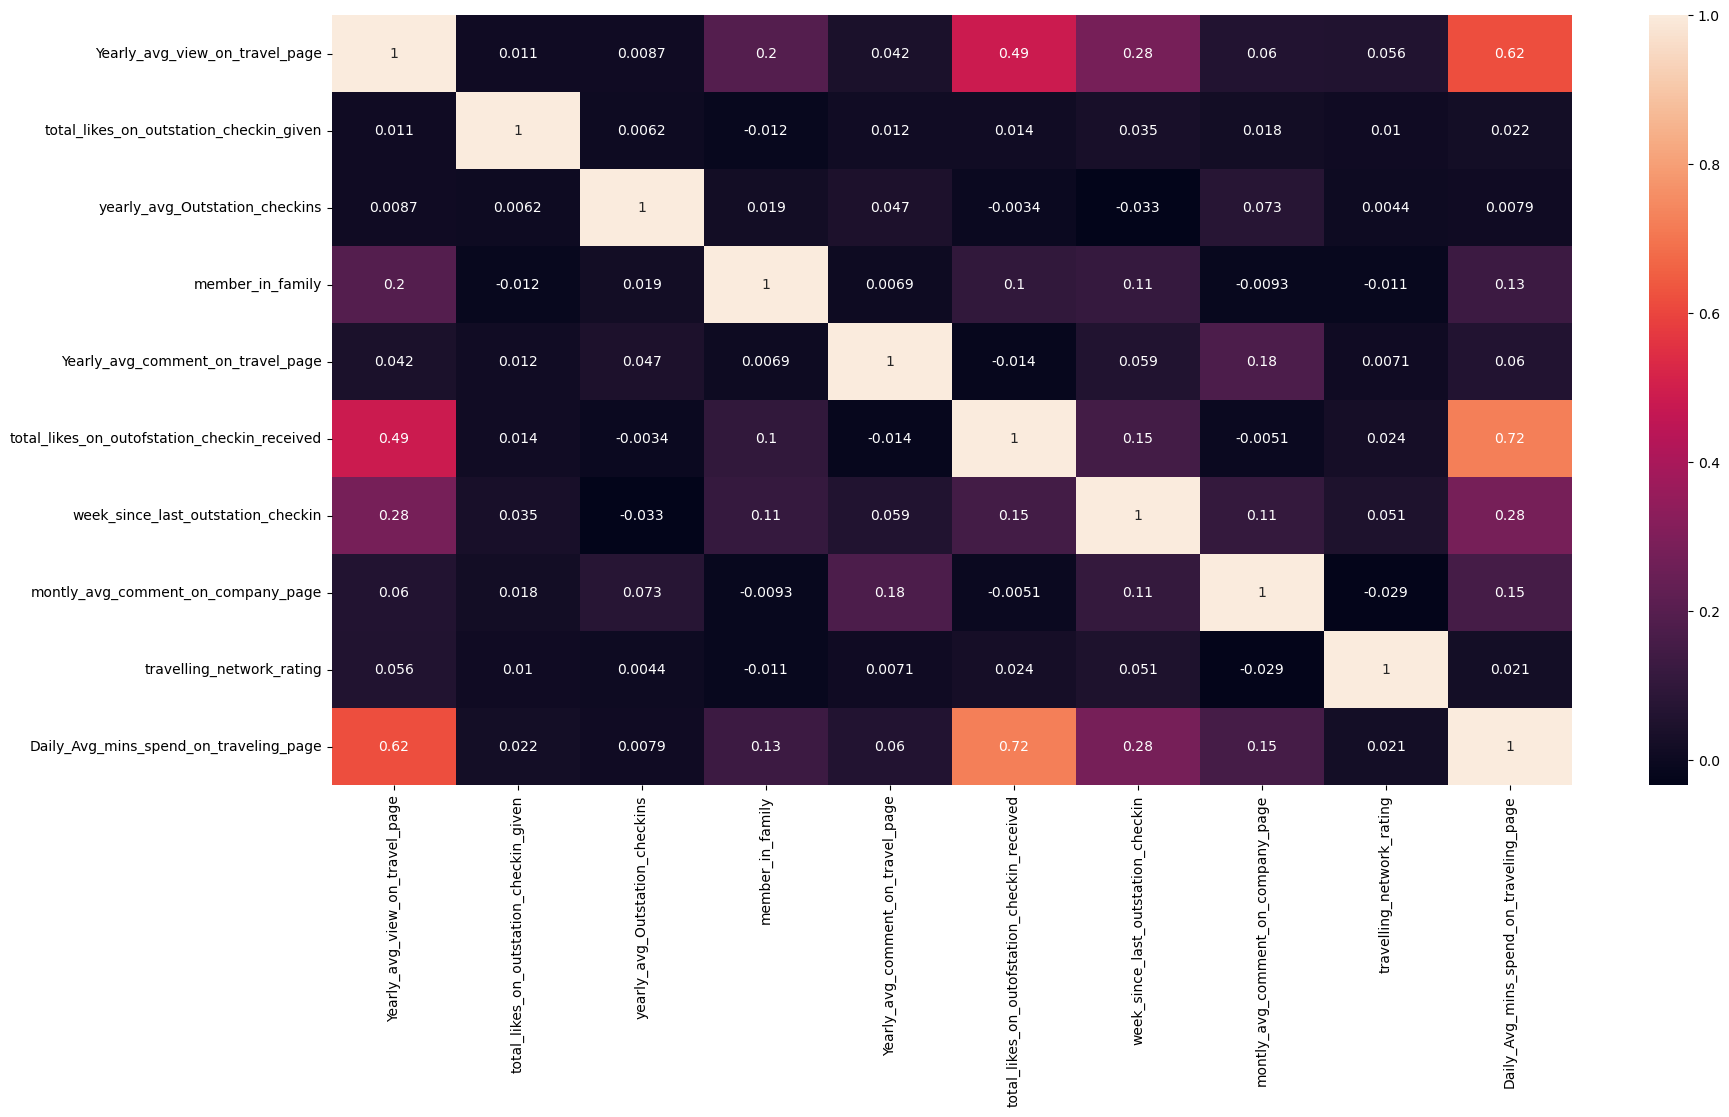

In [59]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot = True)

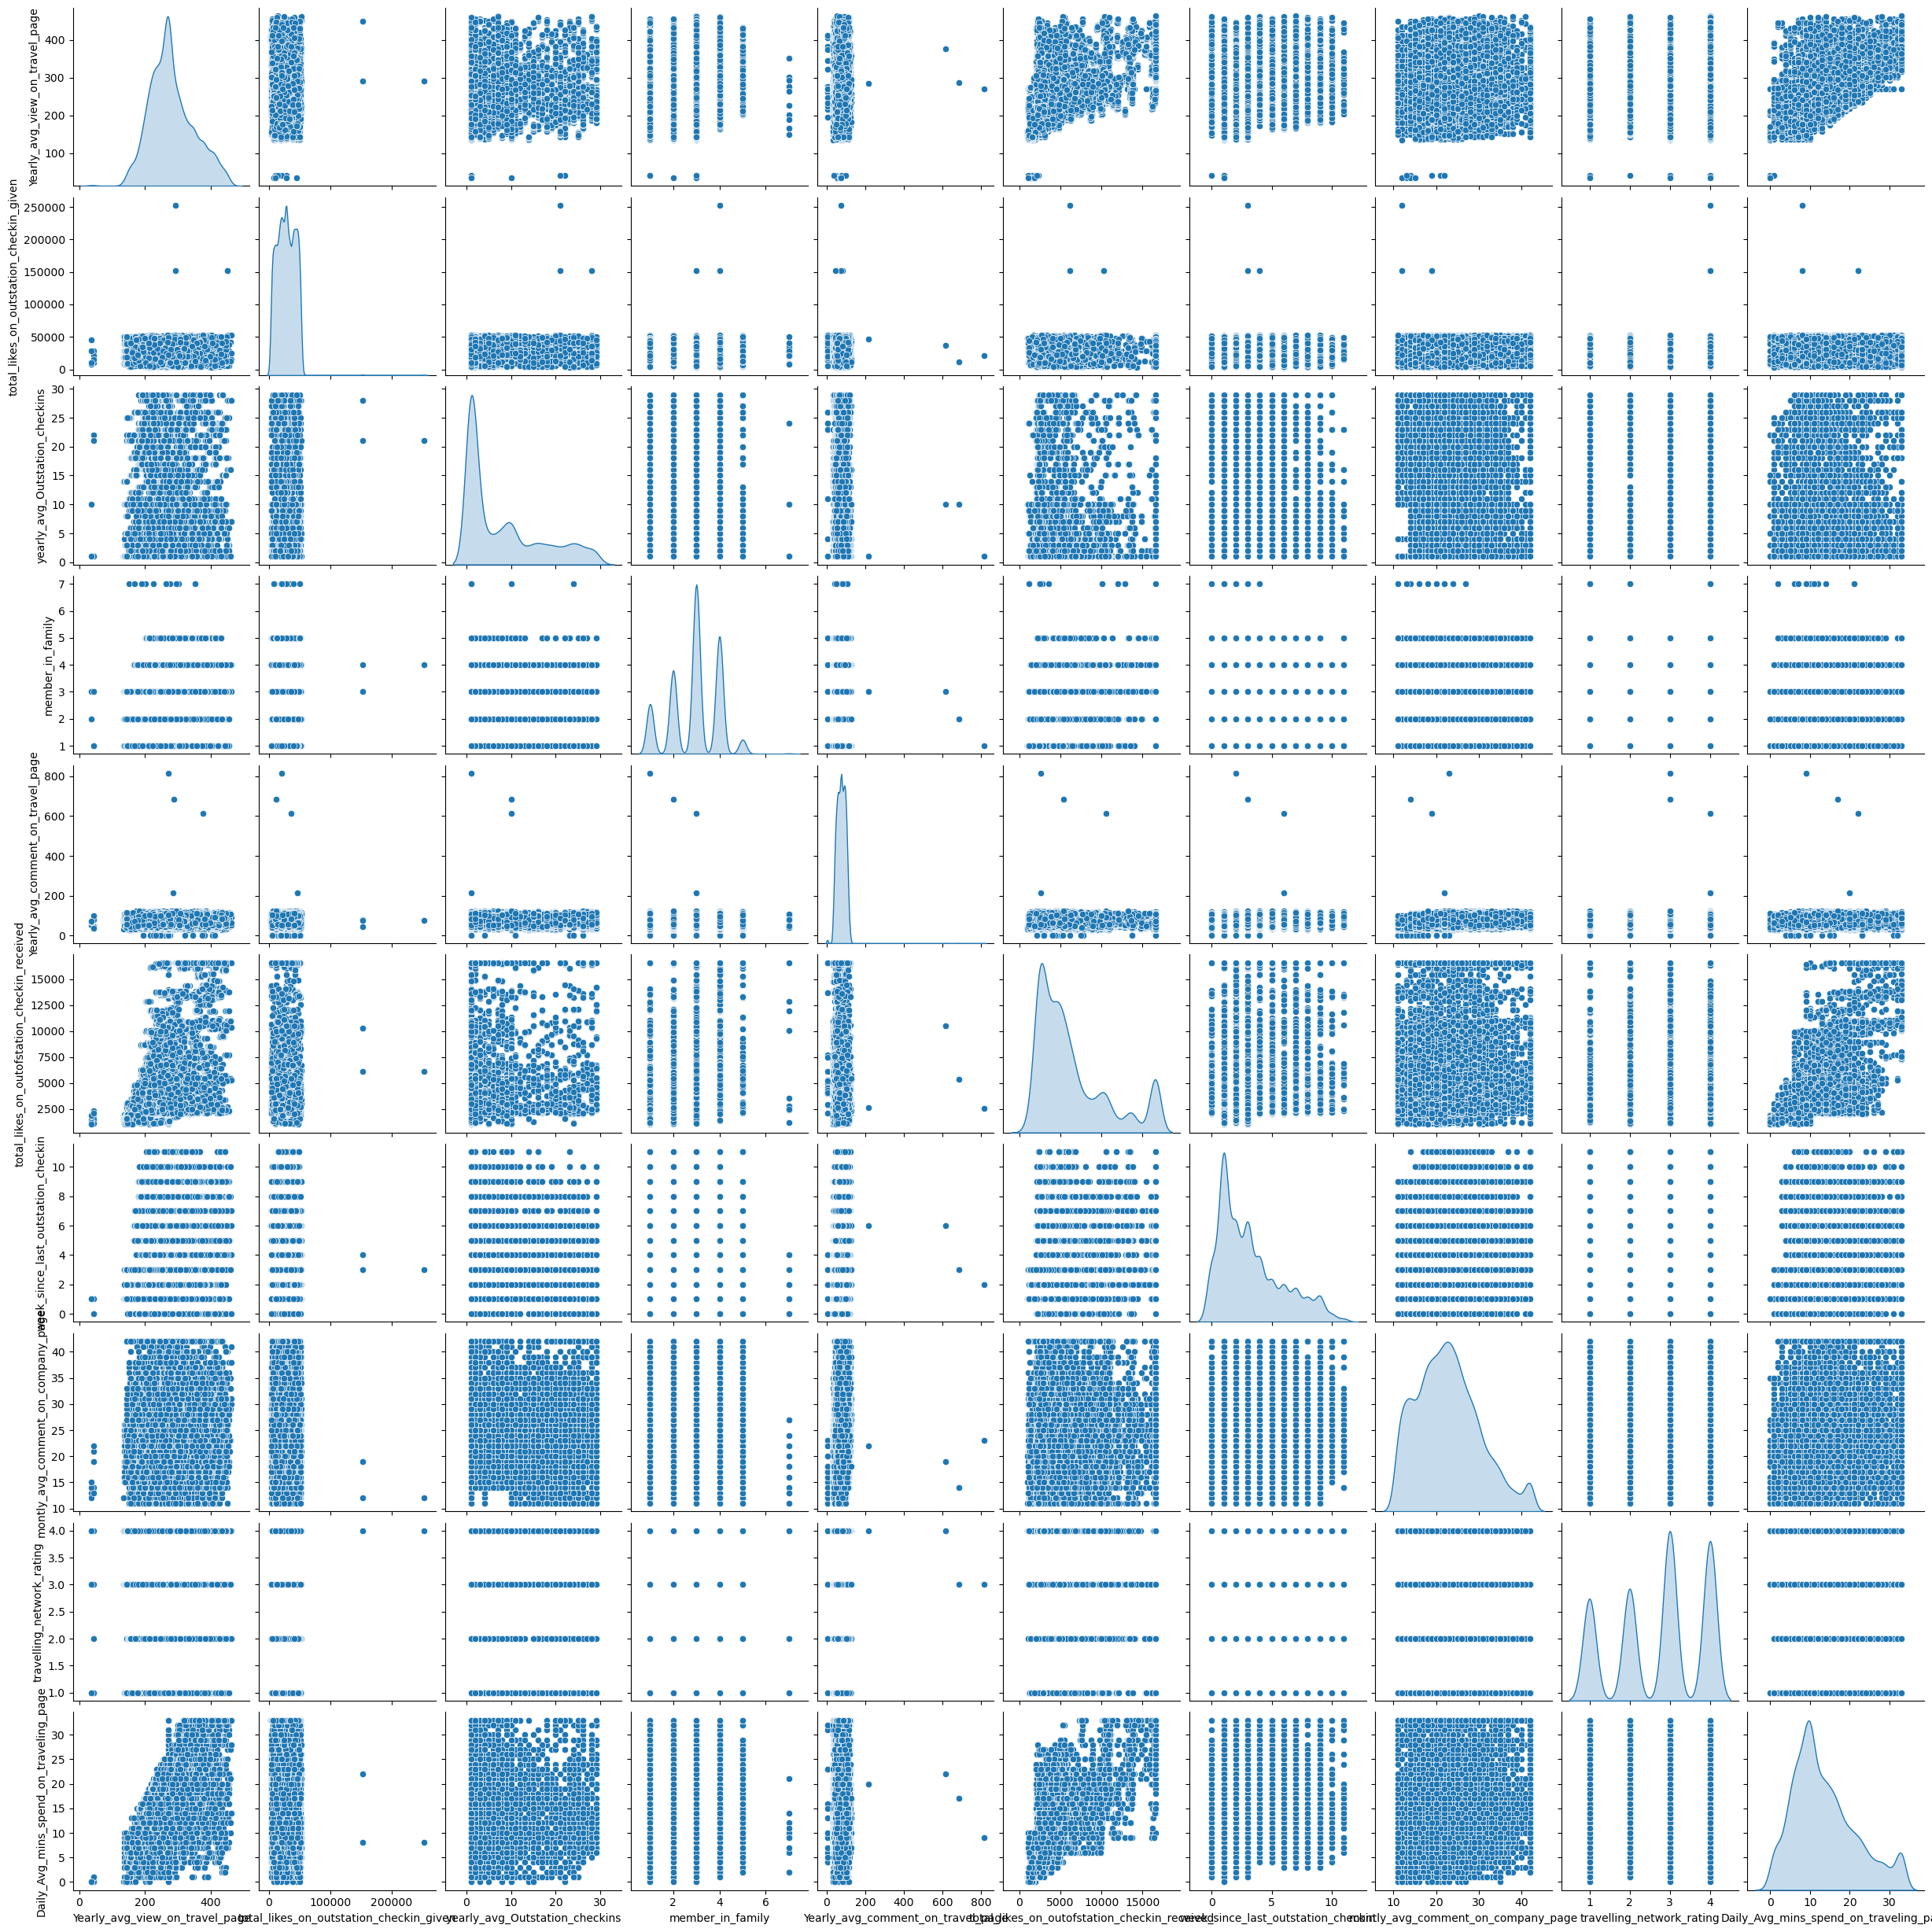

In [60]:
sns.pairplot(df1 , diag_kind = 'kde')

In [61]:
df1

Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0               Yes                          307.00  iOS and Android   
1                No                          367.00              iOS   
2               Yes                          277.00  iOS and Android   
3                No                          247.00              iOS   
4                No                          202.00  iOS and Android   
...             ...                             ...              ...   
11755            No                          279.00           Laptop   
11756            No                          305.00              Tab   
11757            No                          214.00              Tab   
11758            No                          382.00           Laptop   
11759            No                          270.00              Tab   

       total_likes_on_outstation_checkin_given  \
0                                     38570.00   
1                                      9765.00   
2                                     48055.00   
3                                     48720.00   
4                                     20685.00   
...                                        ...   
11755                                 30987.00   
11756                                 21510.00   
11757                                  5478.00   
11758                                 35851.00   
11759                                 22025.00   

       yearly_avg_Outstation_checkins  member_in_family  \
0                                1.00              2.00   
1                                1.00              1.00   
2                                1.00              2.00   
3                                1.00              4.00   
4                                1.00              1.00   
...                               ...               ...   
11755                           23.00              2.00   
11756                            6.00              1.00   
11757                            4.00              3.00   
11758                            2.00              3.00   
11759                            8.00              3.00   

      preferred_location_type  Yearly_avg_comment_on_travel_page  \
0                   Financial                              94.00   
1                   Financial                              61.00   
2                       Other                              92.00   
3                   Financial                              56.00   
4                     Medical                              40.00   
...                       ...                                ...   
11755         Historical site                              58.00   
11756         Historical site                              55.00   
11757                   Beach                             103.00   
11758         Historical site                              83.00   
11759         Historical site                             104.00   

       total_likes_on_outofstation_checkin_received  \
0                                           5993.00   
1                                           5130.00   
2                                           2090.00   
3                                           2909.00   
4                                           3468.00   
...                                             ...   
11755                                       2616.00   
11756                                      10041.00   
11757                                       6203.00   
11758                                       5444.00   
11759                                       4470.00   

       week_since_last_outstation_checkin following_company_page  \
0                                    8.00                    Yes   
1                                    1.00                     No   
2                                    6.00                    Yes   
3                                    1.00                    Yes   
4            

In [62]:
def classify_device(device):
    if pd.isna(device):
        return 'mobile'
    device = device.lower()
    if 'laptop' in device:
        return 'laptop'
    else:
        return 'mobile'

# Apply the function to create the new column
df1['device_category'] = df1['preferred_device'].apply(classify_device)

# Print the DataFrame to see the result
print(df1)

      Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0               Yes                          307.00  iOS and Android   
1                No                          367.00              iOS   
2               Yes                          277.00  iOS and Android   
3                No                          247.00              iOS   
4                No                          202.00  iOS and Android   
...             ...                             ...              ...   
11755            No                          279.00           Laptop   
11756            No                          305.00              Tab   
11757            No                          214.00              Tab   
11758            No                          382.00           Laptop   
11759            No                          270.00              Tab   

       total_likes_on_outstation_checkin_given  \
0                                     38570.00   
1                                  

In [63]:
df1

Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0               Yes                          307.00  iOS and Android   
1                No                          367.00              iOS   
2               Yes                          277.00  iOS and Android   
3                No                          247.00              iOS   
4                No                          202.00  iOS and Android   
...             ...                             ...              ...   
11755            No                          279.00           Laptop   
11756            No                          305.00              Tab   
11757            No                          214.00              Tab   
11758            No                          382.00           Laptop   
11759            No                          270.00              Tab   

       total_likes_on_outstation_checkin_given  \
0                                     38570.00   
1                                      9765.00   
2                                     48055.00   
3                                     48720.00   
4                                     20685.00   
...                                        ...   
11755                                 30987.00   
11756                                 21510.00   
11757                                  5478.00   
11758                                 35851.00   
11759                                 22025.00   

       yearly_avg_Outstation_checkins  member_in_family  \
0                                1.00              2.00   
1                                1.00              1.00   
2                                1.00              2.00   
3                                1.00              4.00   
4                                1.00              1.00   
...                               ...               ...   
11755                           23.00              2.00   
11756                            6.00              1.00   
11757                            4.00              3.00   
11758                            2.00              3.00   
11759                            8.00              3.00   

      preferred_location_type  Yearly_avg_comment_on_travel_page  \
0                   Financial                              94.00   
1                   Financial                              61.00   
2                       Other                              92.00   
3                   Financial                              56.00   
4                     Medical                              40.00   
...                       ...                                ...   
11755         Historical site                              58.00   
11756         Historical site                              55.00   
11757                   Beach                             103.00   
11758         Historical site                              83.00   
11759         Historical site                             104.00   

       total_likes_on_outofstation_checkin_received  \
0                                           5993.00   
1                                           5130.00   
2                                           2090.00   
3                                           2909.00   
4                                           3468.00   
...                                             ...   
11755                                       2616.00   
11756                                      10041.00   
11757                                       6203.00   
11758                                       5444.00   
11759                                       4470.00   

       week_since_last_outstation_checkin following_company_page  \
0                                    8.00                    Yes   
1                                    1.00                     No   
2                                    6.00                    Yes   
3                                    1.00                    Yes   
4            

In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11760 non-null  object 
 1   Yearly_avg_view_on_travel_page                11760 non-null  float64
 2   preferred_device                              11760 non-null  object 
 3   total_likes_on_outstation_checkin_given       11760 non-null  float64
 4   yearly_avg_Outstation_checkins                11760 non-null  float64
 5   member_in_family                              11760 non-null  float64
 6   preferred_location_type                       11760 non-null  object 
 7   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 8   total_likes_on_outofstation_checkin_received  11760 non-null  float64
 9   week_since_last_outstation_checkin            11760 non-null 

In [65]:
df1['Taken_product'].unique()

array(['Yes', 'No'], dtype=object)

In [66]:
df1['Taken_product'].replace({'Yes': 1,'No': 0}, inplace = True)

In [67]:
df1['following_company_page'].unique()

array(['Yes', 'No', '1', '0'], dtype=object)

In [68]:
df1['following_company_page'].replace({'Yes': 1,'No': 0}, inplace = True)

In [69]:
df1['working_flag'].unique()

array(['No', 'Yes'], dtype=object)

In [70]:
df1['working_flag'].replace({'Yes': 1,'No': 0}, inplace = True)

In [71]:
df1['Adult_flag'].unique()

array(['No', 'Yes'], dtype=object)

In [72]:
df1['Adult_flag'].replace({'Yes': 1,'No': 0}, inplace = True)

In [73]:
df1['device_category'].unique()

array(['mobile', 'laptop'], dtype=object)

In [74]:
df1['device_category'].replace({'mobile': 1,'laptop': 0}, inplace = True)

In [75]:
df1

Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0                  1                          307.00  iOS and Android   
1                  0                          367.00              iOS   
2                  1                          277.00  iOS and Android   
3                  0                          247.00              iOS   
4                  0                          202.00  iOS and Android   
...              ...                             ...              ...   
11755              0                          279.00           Laptop   
11756              0                          305.00              Tab   
11757              0                          214.00              Tab   
11758              0                          382.00           Laptop   
11759              0                          270.00              Tab   

       total_likes_on_outstation_checkin_given  \
0                                     38570.00   
1                                      9765.00   
2                                     48055.00   
3                                     48720.00   
4                                     20685.00   
...                                        ...   
11755                                 30987.00   
11756                                 21510.00   
11757                                  5478.00   
11758                                 35851.00   
11759                                 22025.00   

       yearly_avg_Outstation_checkins  member_in_family  \
0                                1.00              2.00   
1                                1.00              1.00   
2                                1.00              2.00   
3                                1.00              4.00   
4                                1.00              1.00   
...                               ...               ...   
11755                           23.00              2.00   
11756                            6.00              1.00   
11757                            4.00              3.00   
11758                            2.00              3.00   
11759                            8.00              3.00   

      preferred_location_type  Yearly_avg_comment_on_travel_page  \
0                   Financial                              94.00   
1                   Financial                              61.00   
2                       Other                              92.00   
3                   Financial                              56.00   
4                     Medical                              40.00   
...                       ...                                ...   
11755         Historical site                              58.00   
11756         Historical site                              55.00   
11757                   Beach                             103.00   
11758         Historical site                              83.00   
11759         Historical site                             104.00   

       total_likes_on_outofstation_checkin_received  \
0                                           5993.00   
1                                           5130.00   
2                                           2090.00   
3                                           2909.00   
4                                           3468.00   
...                                             ...   
11755                                       2616.00   
11756                                      10041.00   
11757                                       6203.00   
11758                                       5444.00   
11759                                       4470.00   

       week_since_last_outstation_checkin following_company_page  \
0                                    8.00                      1   
1                                    1.00                      0   
2                                    6.00                      1   
3                                    1.00                      1   
4 

In [76]:
df2 = df1.drop('preferred_device', axis=1)

In [77]:
df2 = df2.drop('preferred_location_type', axis=1)

In [78]:
df2

Taken_product  Yearly_avg_view_on_travel_page  \
0                  1                          307.00   
1                  0                          367.00   
2                  1                          277.00   
3                  0                          247.00   
4                  0                          202.00   
...              ...                             ...   
11755              0                          279.00   
11756              0                          305.00   
11757              0                          214.00   
11758              0                          382.00   
11759              0                          270.00   

       total_likes_on_outstation_checkin_given  \
0                                     38570.00   
1                                      9765.00   
2                                     48055.00   
3                                     48720.00   
4                                     20685.00   
...                                        ...   
11755                                 30987.00   
11756                                 21510.00   
11757                                  5478.00   
11758                                 35851.00   
11759                                 22025.00   

       yearly_avg_Outstation_checkins  member_in_family  \
0                                1.00              2.00   
1                                1.00              1.00   
2                                1.00              2.00   
3                                1.00              4.00   
4                                1.00              1.00   
...                               ...               ...   
11755                           23.00              2.00   
11756                            6.00              1.00   
11757                            4.00              3.00   
11758                            2.00              3.00   
11759                            8.00              3.00   

       Yearly_avg_comment_on_travel_page  \
0                                  94.00   
1                                  61.00   
2                                  92.00   
3                                  56.00   
4                                  40.00   
...                                  ...   
11755                              58.00   
11756                              55.00   
11757                             103.00   
11758                              83.00   
11759                             104.00   

       total_likes_on_outofstation_checkin_received  \
0                                           5993.00   
1                                           5130.00   
2                                           2090.00   
3                                           2909.00   
4                                           3468.00   
...                                             ...   
11755                                       2616.00   
11756                                      10041.00   
11757                                       6203.00   
11758                                       5444.00   
11759                                       4470.00   

       week_since_last_outstation_checkin following_company_page  \
0                                    8.00                      1   
1                                    1.00                      0   
2                                    6.00                      1   
3                                    1.00                      1   
4                                    9.00                      0   
...                                   ...                    ...   
11755                                4.00                      0   
11756                                4.00                      0   
11757                                3.00                      1   
11758                                3.00                      0   
11759                                2.00                      0   

       montly_avg

In [79]:
# Check for missing value in any column
df2.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
device_category                                 0
dtype: int64

In [80]:
df_laptop = df2[df2['device_category'] == 0]
df_mobile = df2[df2['device_category'] == 1]

In [81]:
df_laptop['device_category'].unique()

array([0], dtype=int64)

In [82]:
df_laptop

Taken_product  Yearly_avg_view_on_travel_page  \
5881               0                          379.00   
5883               0                          255.00   
5885               0                          250.00   
5888               0                          295.00   
5906               1                          250.00   
...              ...                             ...   
11730              0                          278.00   
11742              1                          388.00   
11746              0                          268.00   
11755              0                          279.00   
11758              0                          382.00   

       total_likes_on_outstation_checkin_given  \
5881                                   9776.00   
5883                                  48725.00   
5885                                  35184.00   
5888                                   7572.00   
5906                                  39379.00   
...                                        ...   
11730                                 24127.00   
11742                                 30775.00   
11746                                 42010.00   
11755                                 30987.00   
11758                                 35851.00   

       yearly_avg_Outstation_checkins  member_in_family  \
5881                             8.00              1.00   
5883                             3.00              4.00   
5885                             2.00              2.00   
5888                            23.00              3.00   
5906                            16.00              1.00   
...                               ...               ...   
11730                            4.00              2.00   
11742                            1.00              4.00   
11746                           18.00              4.00   
11755                           23.00              2.00   
11758                            2.00              3.00   

       Yearly_avg_comment_on_travel_page  \
5881                               64.00   
5883                               59.00   
5885                               84.00   
5888                               48.00   
5906                               80.00   
...                                  ...   
11730                             115.00   
11742                             109.00   
11746                              98.00   
11755                              58.00   
11758                              83.00   

       total_likes_on_outofstation_checkin_received  \
5881                                        5142.00   
5883                                        2913.00   
5885                                        3074.00   
5888                                        9532.00   
5906                                        3926.00   
...                                             ...   
11730                                       5184.00   
11742                                       6787.00   
11746                                       5753.00   
11755                                       2616.00   
11758                                       5444.00   

       week_since_last_outstation_checkin following_company_page  \
5881                                 1.00                      0   
5883                                 1.00                      1   
5885                                 0.00                      0   
5888                                 0.00                      0   
5906                                 1.00                      1   
...                                   ...                    ...   
11730                                7.00                      0   
11742                                8.00                      0   
11746                                2.00                      1   
11755                                4.00                      0   
11758                                3.00                      0   

       montly_avg

In [83]:
df_mobile['device_category'].unique()

array([1], dtype=int64)

In [84]:
df_mobile

Taken_product  Yearly_avg_view_on_travel_page  \
0                  1                          307.00   
1                  0                          367.00   
2                  1                          277.00   
3                  0                          247.00   
4                  0                          202.00   
...              ...                             ...   
11753              0                          247.00   
11754              0                          210.00   
11756              0                          305.00   
11757              0                          214.00   
11759              0                          270.00   

       total_likes_on_outstation_checkin_given  \
0                                     38570.00   
1                                      9765.00   
2                                     48055.00   
3                                     48720.00   
4                                     20685.00   
...                                        ...   
11753                                 11418.00   
11754                                 40886.00   
11756                                 21510.00   
11757                                  5478.00   
11759                                 22025.00   

       yearly_avg_Outstation_checkins  member_in_family  \
0                                1.00              2.00   
1                                1.00              1.00   
2                                1.00              2.00   
3                                1.00              4.00   
4                                1.00              1.00   
...                               ...               ...   
11753                            5.00              3.00   
11754                            5.00              3.00   
11756                            6.00              1.00   
11757                            4.00              3.00   
11759                            8.00              3.00   

       Yearly_avg_comment_on_travel_page  \
0                                  94.00   
1                                  61.00   
2                                  92.00   
3                                  56.00   
4                                  40.00   
...                                  ...   
11753                              99.00   
11754                              53.00   
11756                              55.00   
11757                             103.00   
11759                             104.00   

       total_likes_on_outofstation_checkin_received  \
0                                           5993.00   
1                                           5130.00   
2                                           2090.00   
3                                           2909.00   
4                                           3468.00   
...                                             ...   
11753                                       9983.00   
11754                                       3024.00   
11756                                      10041.00   
11757                                       6203.00   
11759                                       4470.00   

       week_since_last_outstation_checkin following_company_page  \
0                                    8.00                      1   
1                                    1.00                      0   
2                                    6.00                      1   
3                                    1.00                      1   
4                                    9.00                      0   
...                                   ...                    ...   
11753                                1.00                      0   
11754                                2.00                      0   
11756                                4.00                      0   
11757                                3.00                      1   
11759                                2.00                      0   

       montly_avg

In [85]:
df_mobile = df_mobile.drop(columns=['device_category'])

In [86]:
df_laptop = df_laptop.drop(columns=['device_category'])

### Models

In [87]:
# Arrange data into independent variables and dependent variables
X_mobile = df_mobile.drop(["Taken_product"],axis=1)  ## Features
y_mobile = df_mobile["Taken_product"]  ## Target

In [88]:
# Arrange data into independent variables and dependent variables
X_laptop = df_laptop.drop(["Taken_product"],axis=1)  ## Features
y_laptop = df_laptop["Taken_product"]  ## Target

In [89]:
df_mobile.shape

(10652, 14)

In [90]:
df_laptop.shape

(1108, 14)

In [91]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train_mobile, X_test_mobile, y_train_mobile, y_test_mobile = train_test_split(X_mobile, y_mobile, test_size=0.30 , random_state=1)
X_train_laptop, X_test_laptop, y_train_laptop, y_test_laptop = train_test_split(X_laptop, y_laptop, test_size=0.30 , random_state=1)

In [92]:
#Generalising code for different models

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_test_prob = model.predict_proba(X_test)[:, 1]
    
    print("Model Score (Train):", model.score(X_train, y_train))
    print("Model Score (Test):", model.score(X_test, y_test))
    print("Confusion Matrix (Train):\n", confusion_matrix(y_train, y_train_pred))
    print("Classification Report (Train):\n", classification_report(y_train, y_train_pred))
    print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred))
    print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))
    
    train_auc = roc_auc_score(y_train, y_train_prob)
    test_auc = roc_auc_score(y_test, y_test_prob)
    print('Train AUC: %.3f' % train_auc)
    print('Test AUC: %.3f' % test_auc)
    
    train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
    test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)
    
    plt.figure(figsize=(8, 6))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(train_fpr, train_tpr, label='Train ROC Curve (AUC = {:.3f})'.format(train_auc))
    plt.plot(test_fpr, test_tpr, label='Test ROC Curve (AUC = {:.3f})'.format(test_auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [93]:
# Defining models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

logistic_model = LogisticRegression(max_iter=1000)
random_forest_model = RandomForestClassifier(random_state=1)
gradient_boosting_model = GradientBoostingClassifier(random_state=1)
knn_model = KNeighborsClassifier()

Laptop Users:
Model Score (Train): 0.8206451612903226
Model Score (Test): 0.8108108108108109
Confusion Matrix (Train):
 [[561  33]
 [106  75]]
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.84      0.94      0.89       594
           1       0.69      0.41      0.52       181

    accuracy                           0.82       775
   macro avg       0.77      0.68      0.70       775
weighted avg       0.81      0.82      0.80       775

Confusion Matrix (Test):
 [[223  15]
 [ 48  47]]
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.82      0.94      0.88       238
           1       0.76      0.49      0.60        95

    accuracy                           0.81       333
   macro avg       0.79      0.72      0.74       333
weighted avg       0.80      0.81      0.80       333

Train AUC: 0.809
Test AUC: 0.861


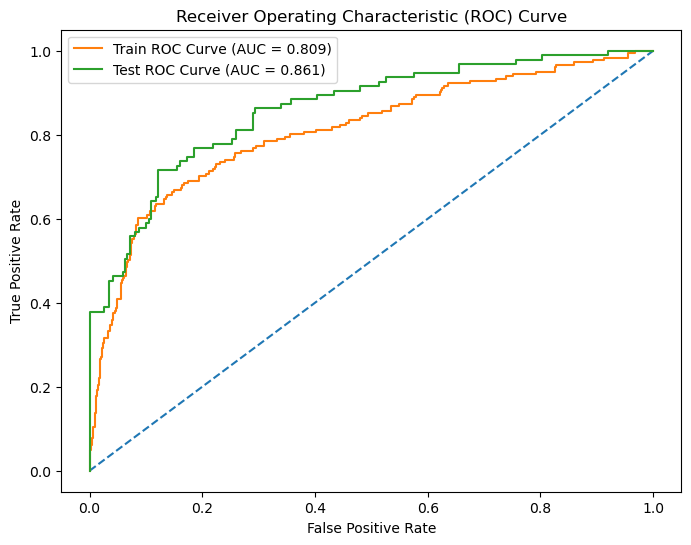

Model Score (Train): 1.0
Model Score (Test): 0.975975975975976
Confusion Matrix (Train):
 [[594   0]
 [  0 181]]
Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775

Confusion Matrix (Test):
 [[238   0]
 [  8  87]]
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       238
           1       1.00      0.92      0.96        95

    accuracy                           0.98       333
   macro avg       0.98      0.96      0.97       333
weighted avg       0.98      0.98      0.98       333

Train AUC: 1.000
Test AUC: 0.999


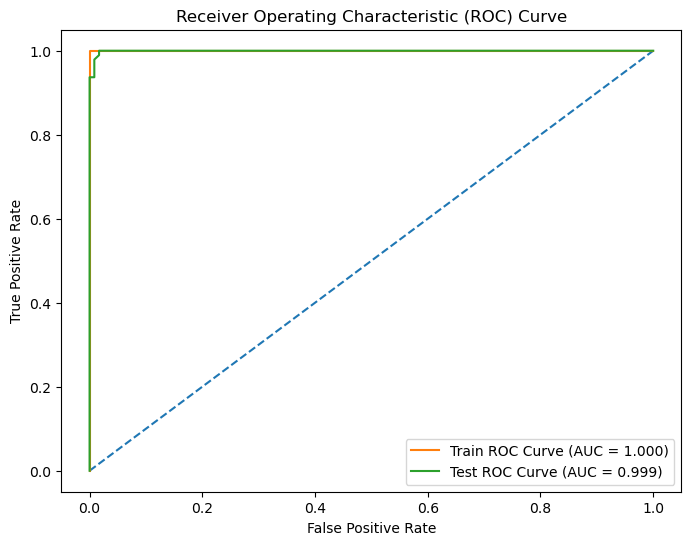

Model Score (Train): 0.983225806451613
Model Score (Test): 0.93993993993994
Confusion Matrix (Train):
 [[594   0]
 [ 13 168]]
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       594
           1       1.00      0.93      0.96       181

    accuracy                           0.98       775
   macro avg       0.99      0.96      0.98       775
weighted avg       0.98      0.98      0.98       775

Confusion Matrix (Test):
 [[234   4]
 [ 16  79]]
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       238
           1       0.95      0.83      0.89        95

    accuracy                           0.94       333
   macro avg       0.94      0.91      0.92       333
weighted avg       0.94      0.94      0.94       333

Train AUC: 0.999
Test AUC: 0.989


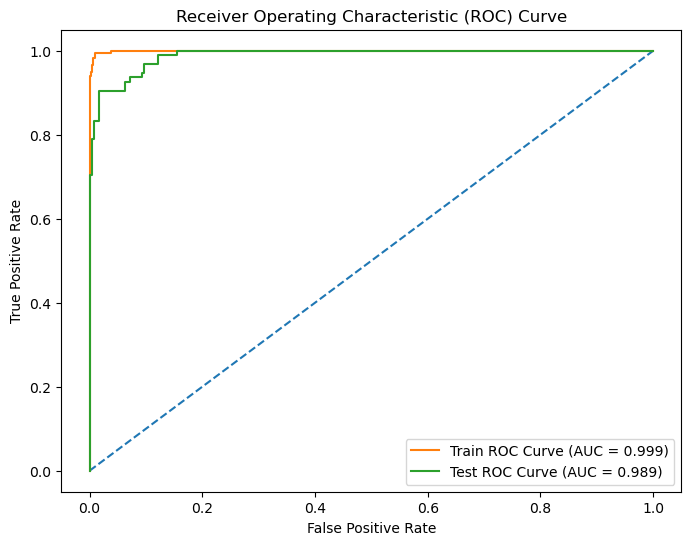

Model Score (Train): 0.9483870967741935
Model Score (Test): 0.8558558558558559
Confusion Matrix (Train):
 [[579  15]
 [ 25 156]]
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       594
           1       0.91      0.86      0.89       181

    accuracy                           0.95       775
   macro avg       0.94      0.92      0.93       775
weighted avg       0.95      0.95      0.95       775

Confusion Matrix (Test):
 [[221  17]
 [ 31  64]]
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       238
           1       0.79      0.67      0.73        95

    accuracy                           0.86       333
   macro avg       0.83      0.80      0.81       333
weighted avg       0.85      0.86      0.85       333

Train AUC: 0.982
Test AUC: 0.928


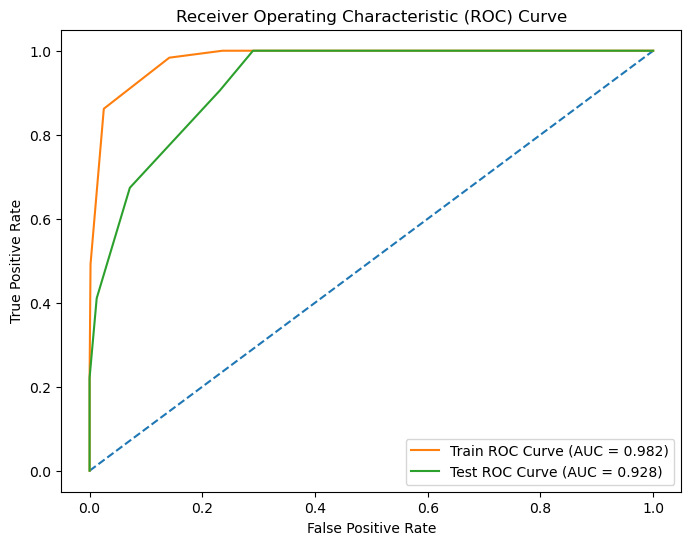

In [94]:
# Evaluating models for Laptop users

print("Laptop Users:")
evaluate_model(logistic_model, X_train_laptop, y_train_laptop, X_test_laptop, y_test_laptop)
evaluate_model(random_forest_model, X_train_laptop, y_train_laptop, X_test_laptop, y_test_laptop)
evaluate_model(gradient_boosting_model, X_train_laptop, y_train_laptop, X_test_laptop, y_test_laptop)
evaluate_model(knn_model, X_train_laptop, y_train_laptop, X_test_laptop, y_test_laptop)


Mobile Users:
Model Score (Train): 0.8489806866952789
Model Score (Test): 0.8438673341677096
Confusion Matrix (Train):
 [[6320   10]
 [1116   10]]
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      6330
           1       0.50      0.01      0.02      1126

    accuracy                           0.85      7456
   macro avg       0.67      0.50      0.47      7456
weighted avg       0.80      0.85      0.78      7456

Confusion Matrix (Test):
 [[2696    6]
 [ 493    1]]
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2702
           1       0.14      0.00      0.00       494

    accuracy                           0.84      3196
   macro avg       0.49      0.50      0.46      3196
weighted avg       0.74      0.84      0.77      3196

Train AUC: 0.703
Test AUC: 0.702


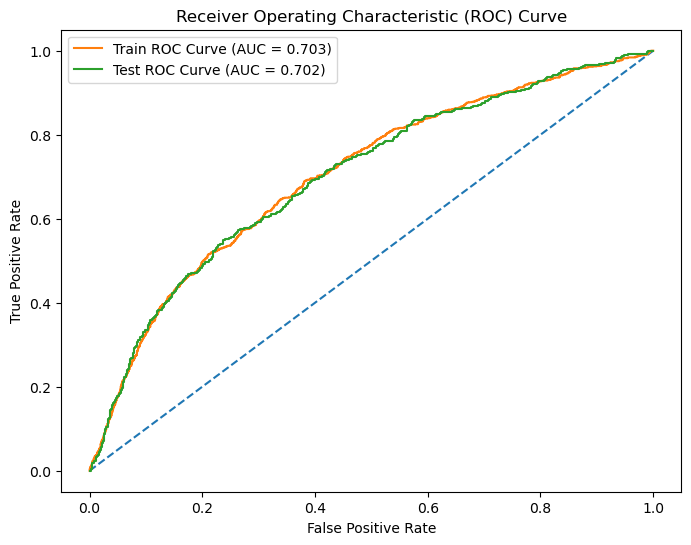

Model Score (Train): 1.0
Model Score (Test): 0.980287859824781
Confusion Matrix (Train):
 [[6330    0]
 [   0 1126]]
Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456

Confusion Matrix (Test):
 [[2702    0]
 [  63  431]]
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2702
           1       1.00      0.87      0.93       494

    accuracy                           0.98      3196
   macro avg       0.99      0.94      0.96      3196
weighted avg       0.98      0.98      0.98      3196

Train AUC: 1.000
Test AUC: 0.999


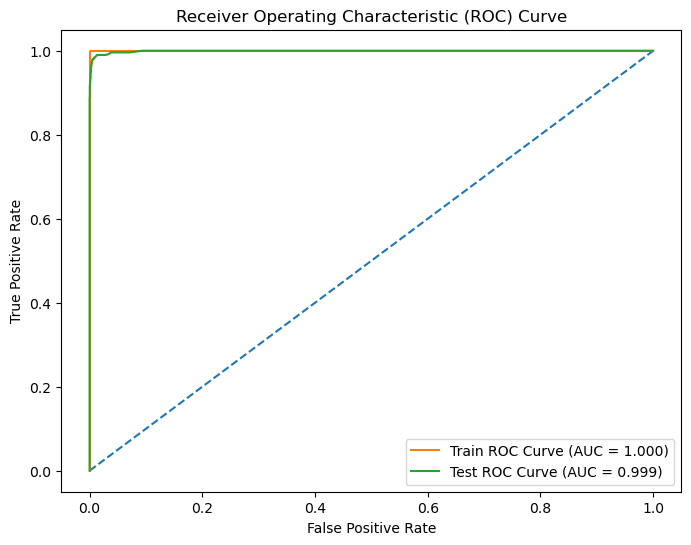

Model Score (Train): 0.9097371244635193
Model Score (Test): 0.8983103879849812
Confusion Matrix (Train):
 [[6280   50]
 [ 623  503]]
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      6330
           1       0.91      0.45      0.60      1126

    accuracy                           0.91      7456
   macro avg       0.91      0.72      0.77      7456
weighted avg       0.91      0.91      0.90      7456

Confusion Matrix (Test):
 [[2669   33]
 [ 292  202]]
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      2702
           1       0.86      0.41      0.55       494

    accuracy                           0.90      3196
   macro avg       0.88      0.70      0.75      3196
weighted avg       0.89      0.90      0.88      3196

Train AUC: 0.932
Test AUC: 0.910


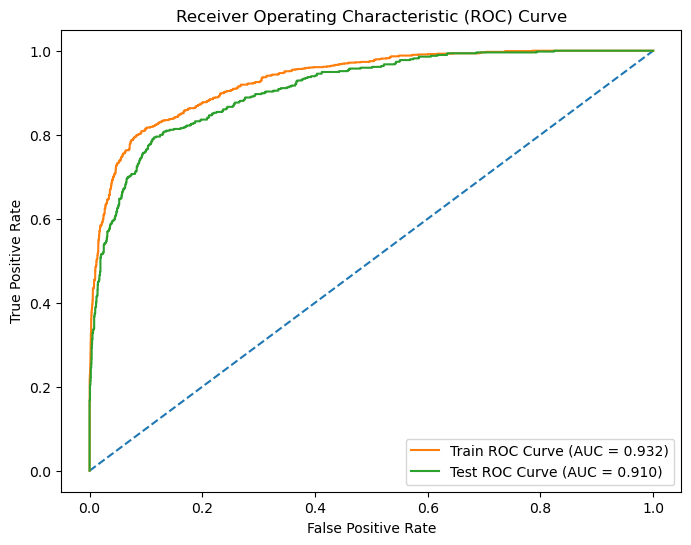

Model Score (Train): 0.9837714592274678
Model Score (Test): 0.9652690863579474
Confusion Matrix (Train):
 [[6307   23]
 [  98 1028]]
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      6330
           1       0.98      0.91      0.94      1126

    accuracy                           0.98      7456
   macro avg       0.98      0.95      0.97      7456
weighted avg       0.98      0.98      0.98      7456

Confusion Matrix (Test):
 [[2676   26]
 [  85  409]]
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2702
           1       0.94      0.83      0.88       494

    accuracy                           0.97      3196
   macro avg       0.95      0.91      0.93      3196
weighted avg       0.96      0.97      0.96      3196

Train AUC: 0.998
Test AUC: 0.989


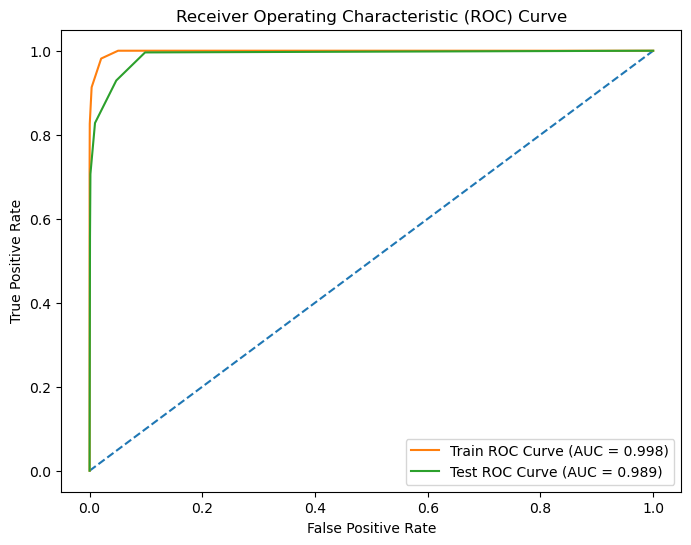

In [95]:
# Evaluating models for Mobile users
print("Mobile Users:")
evaluate_model(logistic_model, X_train_mobile, y_train_mobile, X_test_mobile, y_test_mobile)
evaluate_model(random_forest_model, X_train_mobile, y_train_mobile, X_test_mobile, y_test_mobile)
evaluate_model(gradient_boosting_model, X_train_mobile, y_train_mobile, X_test_mobile, y_test_mobile)
evaluate_model(knn_model, X_train_mobile, y_train_mobile, X_test_mobile, y_test_mobile)

Model tuning for different models

In [108]:
# Hyperparameter grids
param_grid_logistic = {
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


In [97]:
def perform_grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

Laptop Users:
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Model Score (Train): 0.7858064516129032
Model Score (Test): 0.7357357357357357
Confusion Matrix (Train):
 [[584  10]
 [156  25]]
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.79      0.98      0.88       594
           1       0.71      0.14      0.23       181

    accuracy                           0.79       775
   macro avg       0.75      0.56      0.55       775
weighted avg       0.77      0.79      0.73       775

Confusion Matrix (Test):
 [[229   9]
 [ 79  16]]
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.74      0.96      0.84       238
           1       0.64      0.17      0.27        95

    accuracy                           0.74       333
   macro avg       0.69      0.57      0.55       333
weighted avg       0.71      0.74      0.68       333

Train AUC: 0.752
Test AUC: 0.79

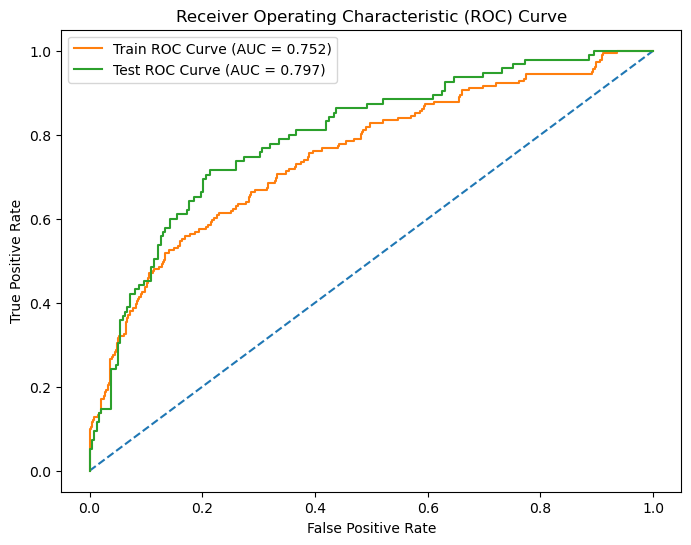

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Model Score (Train): 1.0
Model Score (Test): 0.987987987987988
Confusion Matrix (Train):
 [[594   0]
 [  0 181]]
Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775

Confusion Matrix (Test):
 [[238   0]
 [  4  91]]
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       238
           1       1.00      0.96      0.98        95

    accuracy                           0.99       333
   macro avg       0.99      0.98      0.99       333
weighted avg       0.99      0.99      0.99       333

Train AUC: 1.000
Test AUC: 1.000


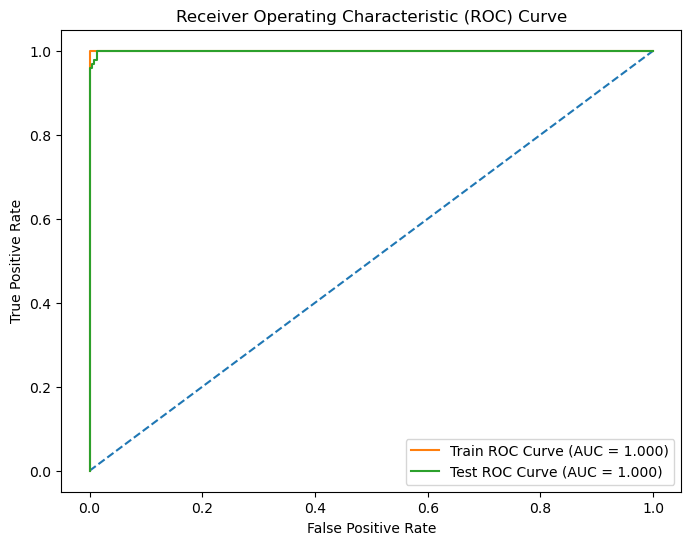

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Model Score (Train): 1.0
Model Score (Test): 1.0
Confusion Matrix (Train):
 [[594   0]
 [  0 181]]
Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775

Confusion Matrix (Test):
 [[238   0]
 [  0  95]]
Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       1.00      1.00      1.00        95

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333

Train AUC: 1.000
Test AUC: 1.000


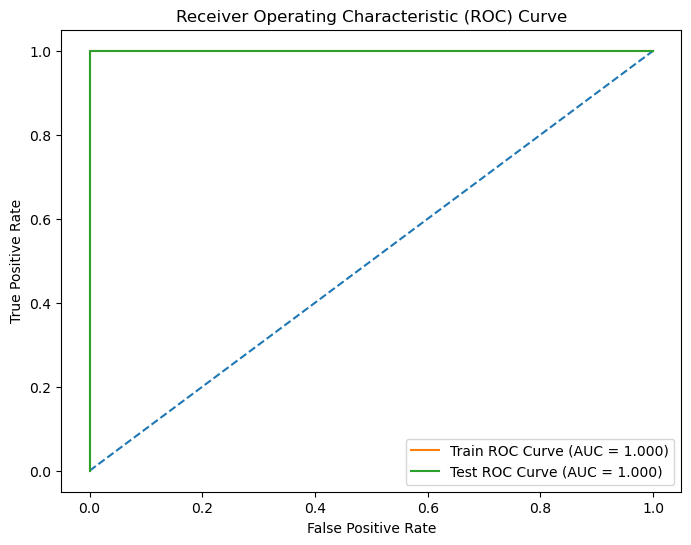

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Model Score (Train): 1.0
Model Score (Test): 0.996996996996997
Confusion Matrix (Train):
 [[594   0]
 [  0 181]]
Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775

Confusion Matrix (Test):
 [[238   0]
 [  1  94]]
Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       1.00      0.99      0.99        95

    accuracy                           1.00       333
   macro avg       1.00      0.99      1.00       333
weighted avg       1.00      1.00      1.00       333

Train AUC: 1.000
Test AUC: 1.000


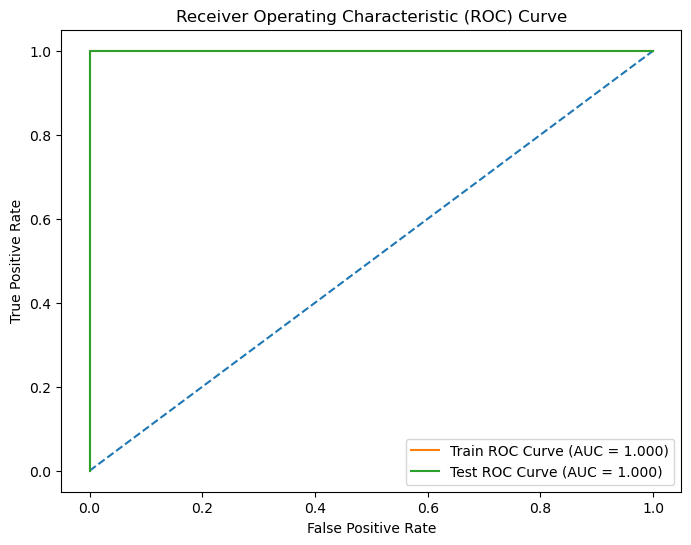

In [98]:
# Evaluate models for Laptop users
print("Laptop Users:")
best_logistic_laptop = perform_grid_search(logistic_model, param_grid_logistic, X_train_laptop, y_train_laptop)
evaluate_model(best_logistic_laptop, X_train_laptop, y_train_laptop, X_test_laptop, y_test_laptop)

best_rf_laptop = perform_grid_search(random_forest_model, param_grid_rf, X_train_laptop, y_train_laptop)
evaluate_model(best_rf_laptop, X_train_laptop, y_train_laptop, X_test_laptop, y_test_laptop)

best_gb_laptop = perform_grid_search(gradient_boosting_model, param_grid_gb, X_train_laptop, y_train_laptop)
evaluate_model(best_gb_laptop, X_train_laptop, y_train_laptop, X_test_laptop, y_test_laptop)

best_knn_laptop = perform_grid_search(knn_model, param_grid_knn, X_train_laptop, y_train_laptop)
evaluate_model(best_knn_laptop, X_train_laptop, y_train_laptop, X_test_laptop, y_test_laptop)

Mobile Users:
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Model Score (Train): 0.8492489270386266
Model Score (Test): 0.8454317897371715
Confusion Matrix (Train):
 [[6330    0]
 [1124    2]]
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      6330
           1       1.00      0.00      0.00      1126

    accuracy                           0.85      7456
   macro avg       0.92      0.50      0.46      7456
weighted avg       0.87      0.85      0.78      7456

Confusion Matrix (Test):
 [[2702    0]
 [ 494    0]]
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2702
           1       0.00      0.00      0.00       494

    accuracy                           0.85      3196
   macro avg       0.42      0.50      0.46      3196
weighted avg       0.71      0.85      0.77      3196

Train AUC: 0.671
Test A

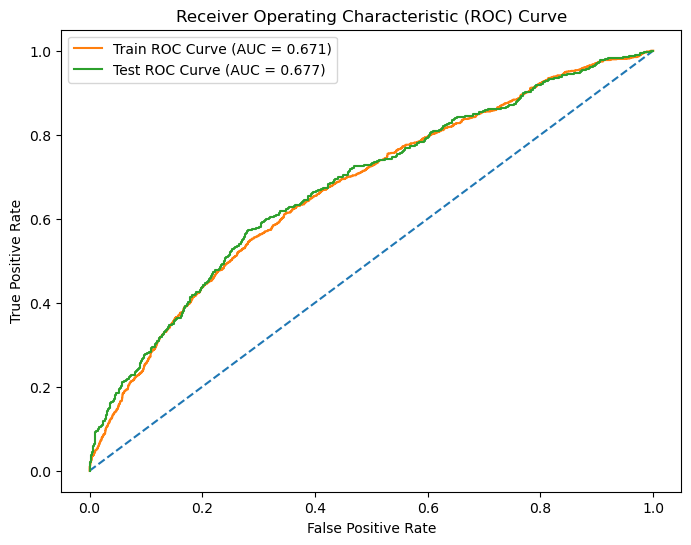

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Model Score (Train): 1.0
Model Score (Test): 0.9793491864831039
Confusion Matrix (Train):
 [[6330    0]
 [   0 1126]]
Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456

Confusion Matrix (Test):
 [[2702    0]
 [  66  428]]
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2702
           1       1.00      0.87      0.93       494

    accuracy                           0.98      3196
   macro avg       0.99      0.93      0.96      3196
weighted avg       0.98      0.98      0.98      3196

Train AUC: 1.000
Test AUC: 0.999


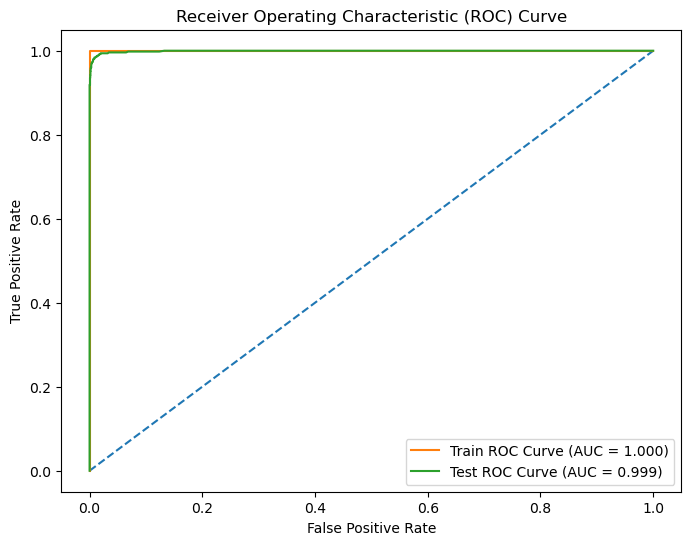

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Model Score (Train): 1.0
Model Score (Test): 0.9918648310387985
Confusion Matrix (Train):
 [[6330    0]
 [   0 1126]]
Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456

Confusion Matrix (Test):
 [[2702    0]
 [  26  468]]
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2702
           1       1.00      0.95      0.97       494

    accuracy                           0.99      3196
   macro avg       1.00      0.97      0.98      3196
weighted avg       0.99      0.99      0.99      3196

Train AUC: 1.000
Test AUC: 1.000


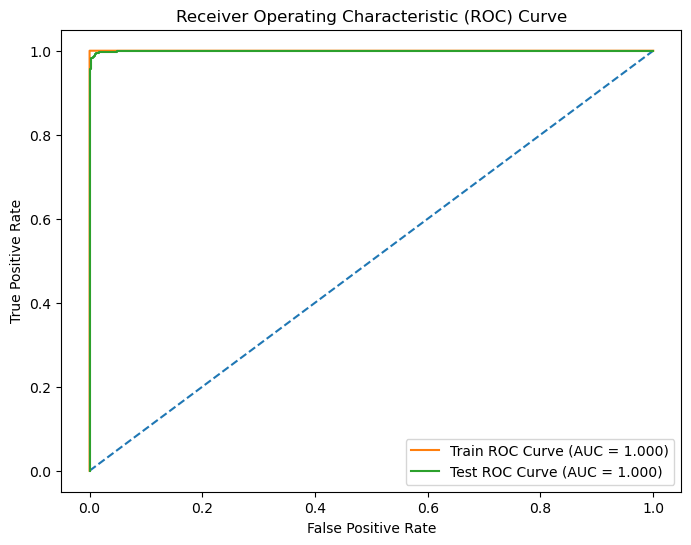

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Model Score (Train): 1.0
Model Score (Test): 0.9912390488110138
Confusion Matrix (Train):
 [[6330    0]
 [   0 1126]]
Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456

Confusion Matrix (Test):
 [[2688   14]
 [  14  480]]
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2702
           1       0.97      0.97      0.97       494

    accuracy                           0.99      3196
   macro avg       0.98      0.98      0.98      3196
weighted avg       0.99      0.99      0.99      3196

Train AUC: 1.000
Test AUC: 0.994


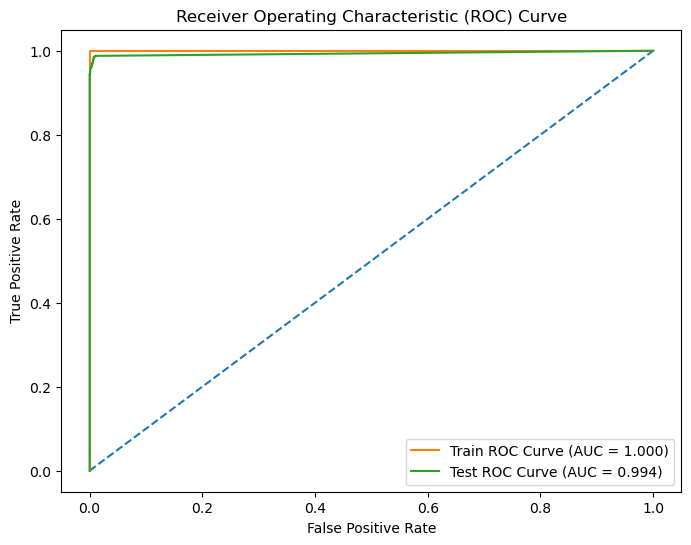

In [111]:
# Evaluate models for Mobile users
print("Mobile Users:")
best_logistic_mobile = perform_grid_search(logistic_model, param_grid_logistic, X_train_mobile, y_train_mobile)
evaluate_model(best_logistic_mobile, X_train_mobile, y_train_mobile, X_test_mobile, y_test_mobile)

best_rf_mobile = perform_grid_search(random_forest_model, param_grid_rf, X_train_mobile, y_train_mobile)
evaluate_model(best_rf_mobile, X_train_mobile, y_train_mobile, X_test_mobile, y_test_mobile)

best_gb_mobile = perform_grid_search(gradient_boosting_model, param_grid_gb, X_train_mobile, y_train_mobile)
evaluate_model(best_gb_mobile, X_train_mobile, y_train_mobile, X_test_mobile, y_test_mobile)

best_knn_mobile = perform_grid_search(knn_model, param_grid_knn, X_train_mobile, y_train_mobile)
evaluate_model(best_knn_mobile, X_train_mobile, y_train_mobile, X_test_mobile, y_test_mobile)